# Set Up

In [1]:
%run SetUp.ipynb

Home Directory = /Users/cjparra/Work/wfey
Log Path = /Users/cjparra/Work/wfey/logs/


# Loading DataFrames

In [2]:
bm_output = pd.read_pickle(HOME_DIRECTORY+'/df/benchmark_output.pkl')
bm_output_raw = pd.read_pickle(HOME_DIRECTORY+'/df/benchmark_output_raw.pkl')

bm_output_clean = pd.read_pickle(HOME_DIRECTORY+'/df/benchmark_output_clean.pkl')
bm_output_clean_raw = pd.read_pickle(HOME_DIRECTORY+'/df/benchmark_output_clean_raw.pkl')

bm_output_flat = bm_output.explode(["hwmon2","hwmon3","time"], ignore_index=True)
bm_output_flat_raw = bm_output_clean_raw.explode(["hwmon2","hwmon3","time"], ignore_index=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(bm_output)

# Graphs -- Overview

## Heat Map

<Axes: >

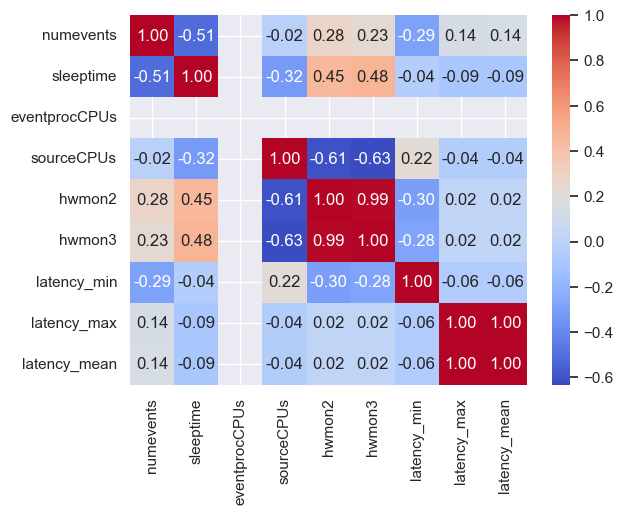

In [3]:
#sns.pairplot(data=bm_output_flat, hue="configs")
corr = bm_output_flat_raw[['numevents', 'sleeptime', 'eventprocCPUs', 'sourceCPUs', 'hwmon2', 'hwmon3', 'latency_min', 'latency_max', 'latency_mean']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

## Correlations with the HW Monitor Numbers

### HWMON2

#### Power Graphs

##### Choosing subsets of plots

In [4]:
sns.set_palette("Paired")
pd.options.mode.chained_assignment = None

eventsubset=[1000, 10000]
sleeptimesubset=["0.01","0.001"]
sourceCPUsubset=["10", "50", "79"]

def return_df(df):
    return df[ (df['numevents'].isin(eventsubset)) & (df['sleeptime'].isin(sleeptimesubset)) & (df['sourceCPUs'].isin(sourceCPUsubset))].copy()

df_used = return_df(bm_output)

##### Power values over time -- Differentiated by NumEvents

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/441464152.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


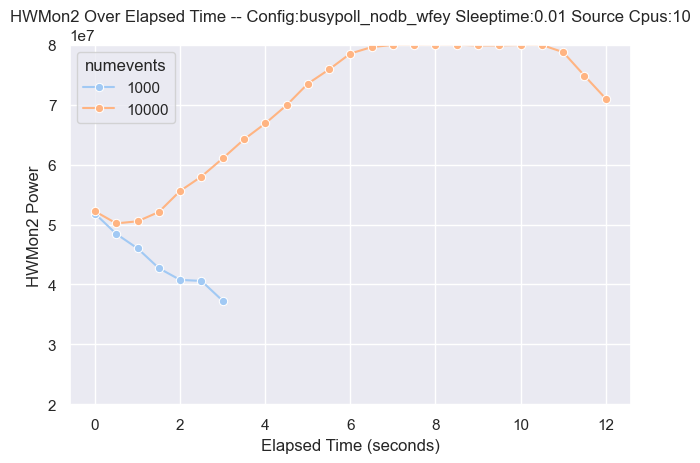

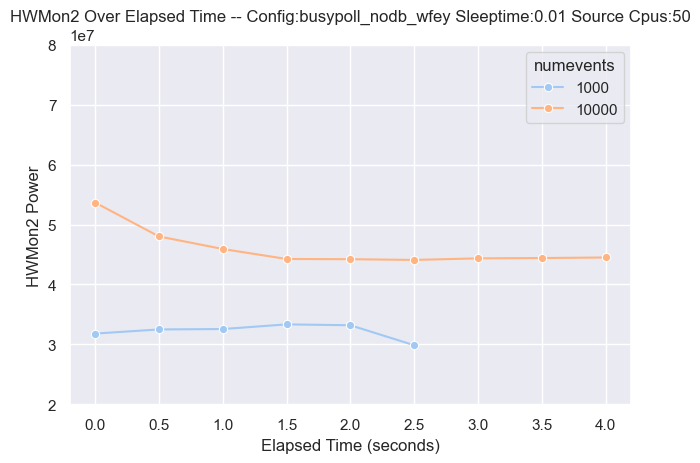

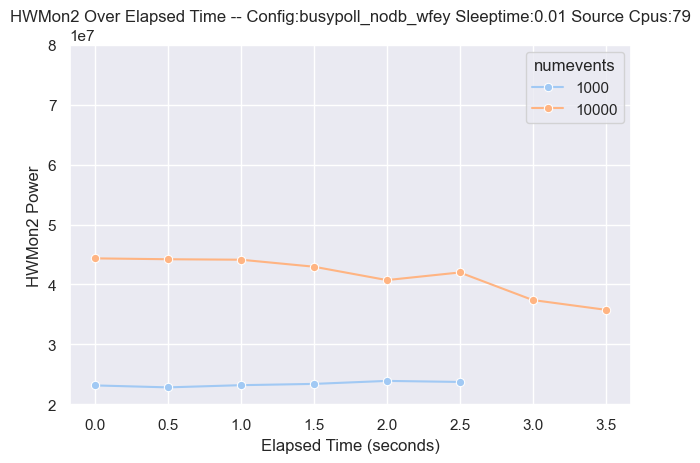

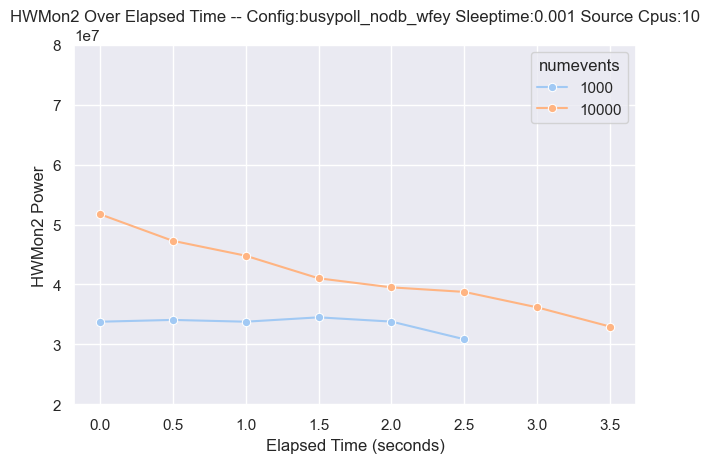

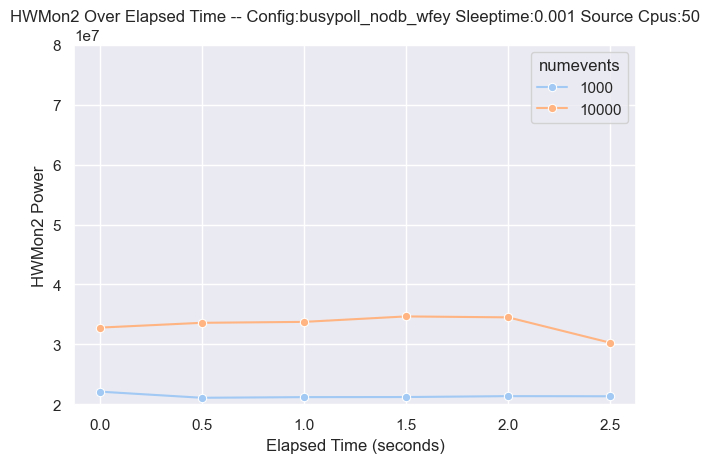

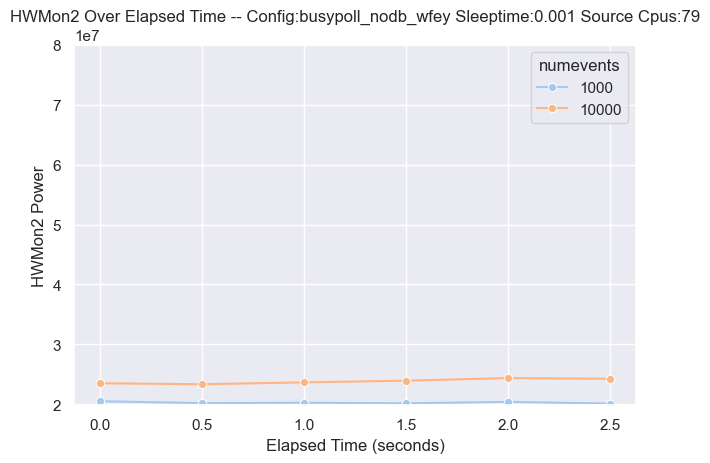

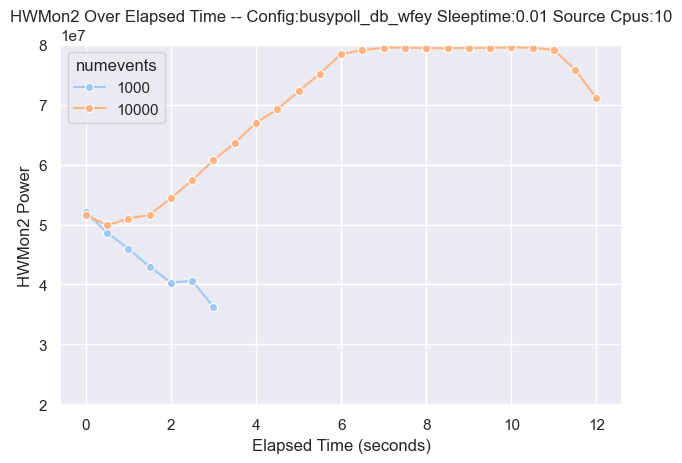

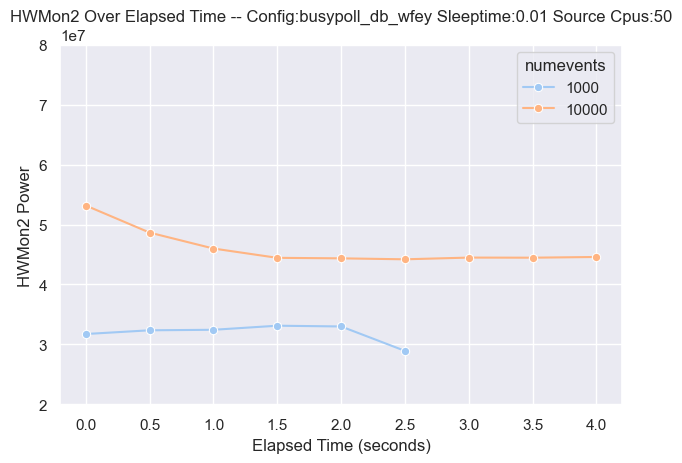

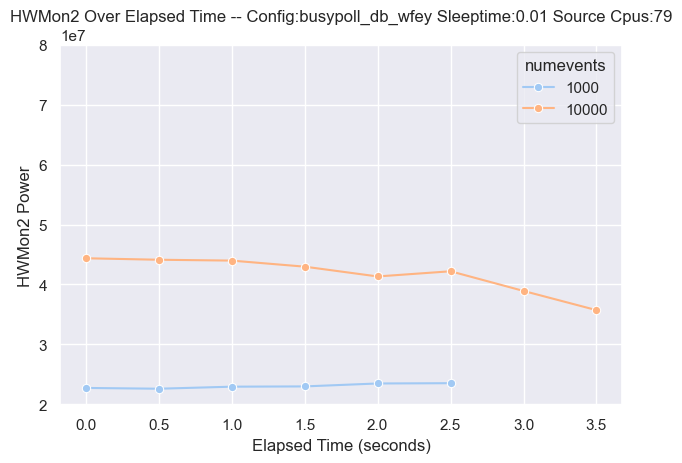

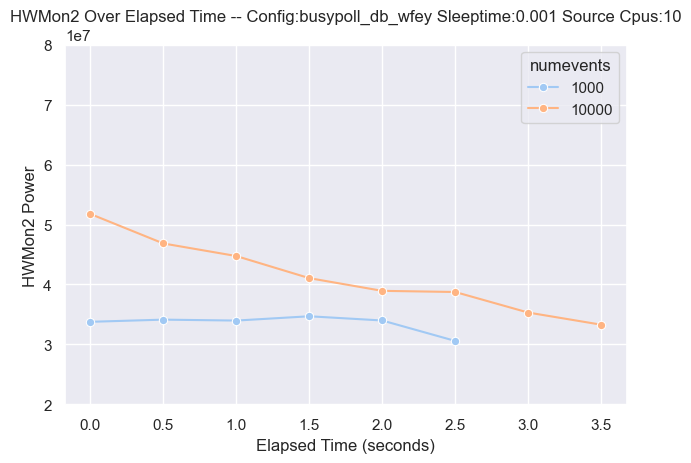

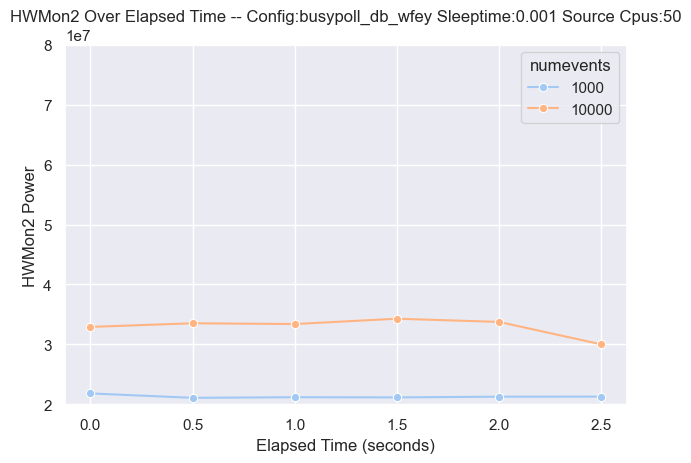

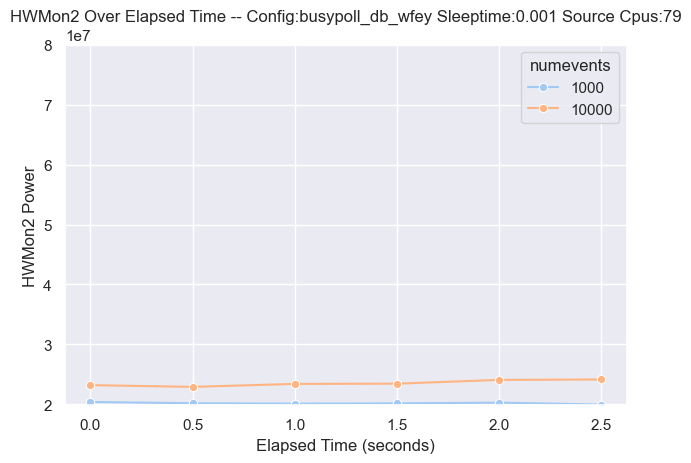

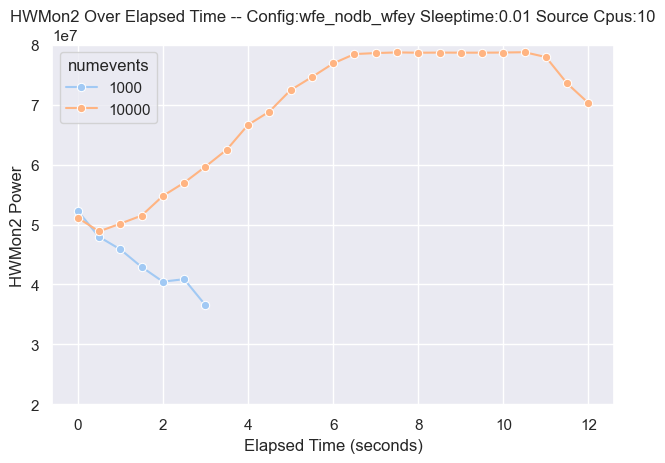

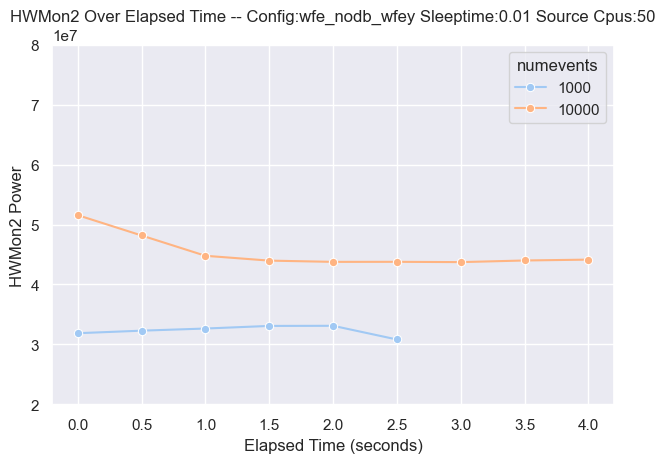

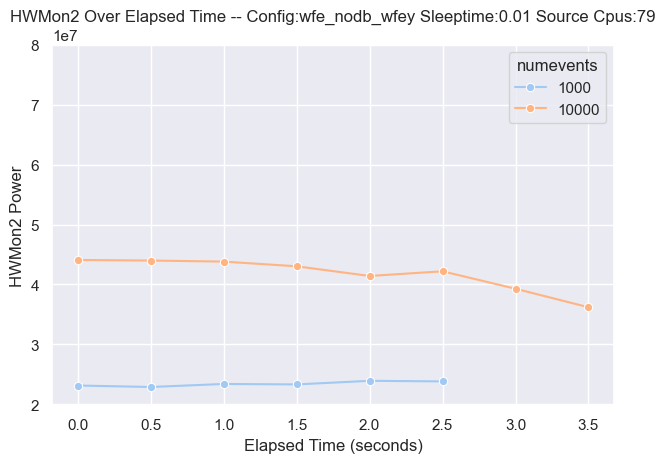

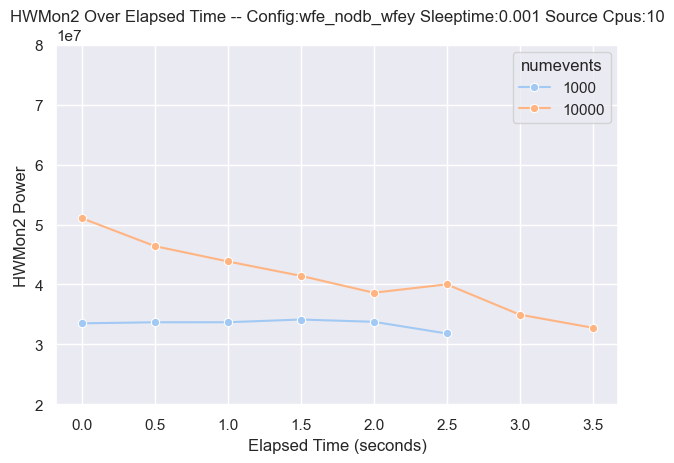

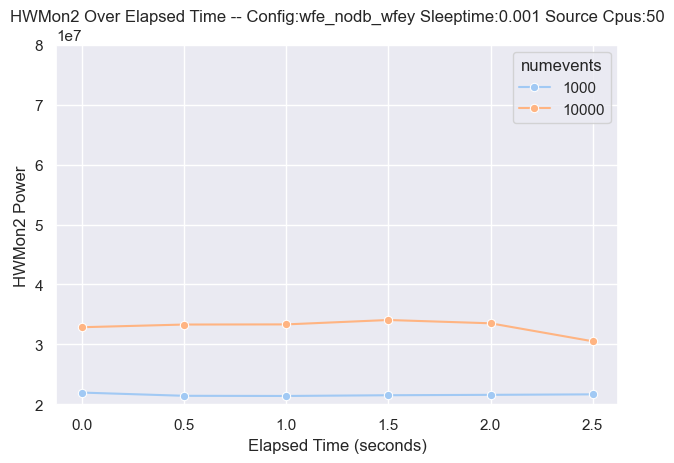

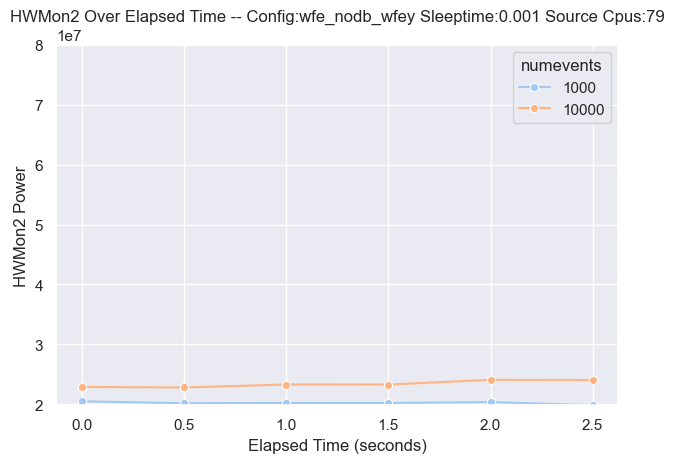

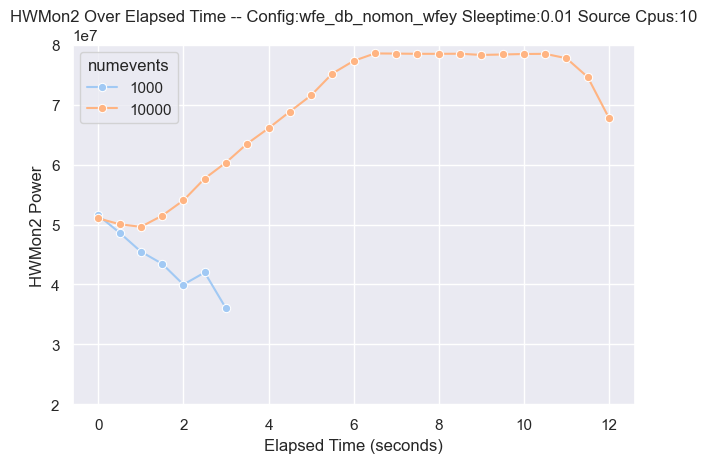

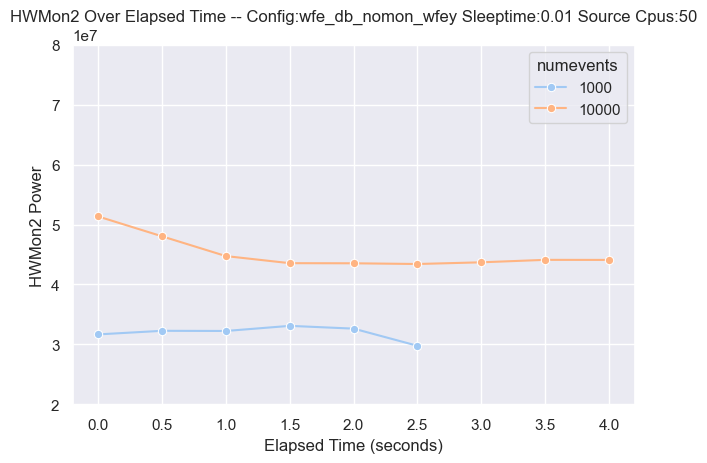

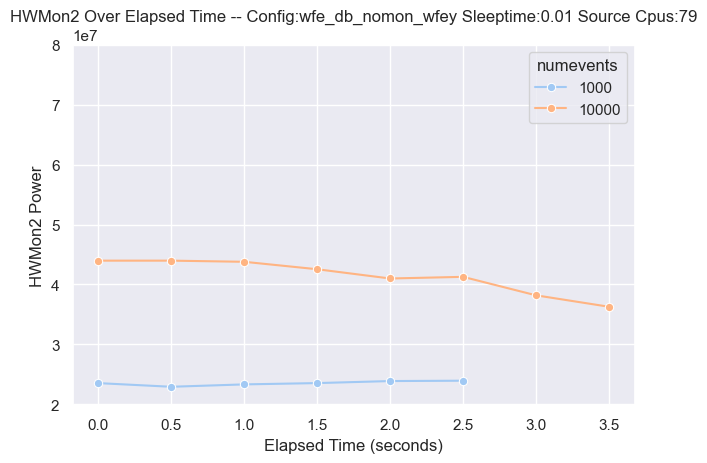

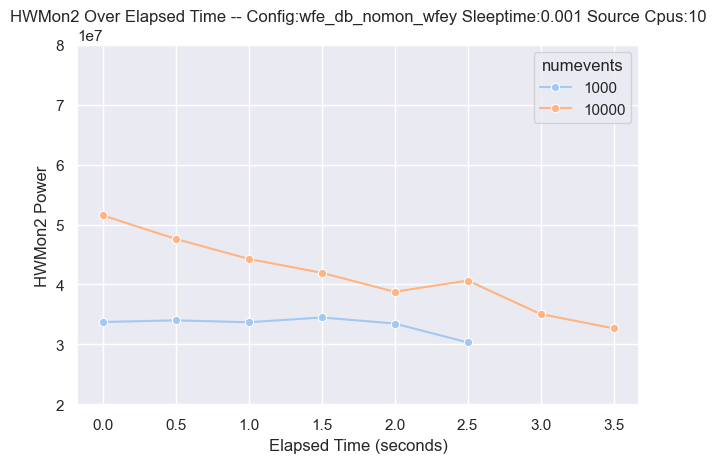

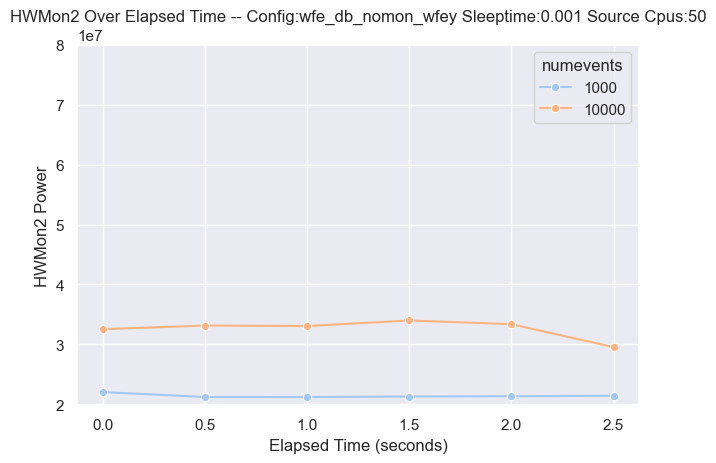

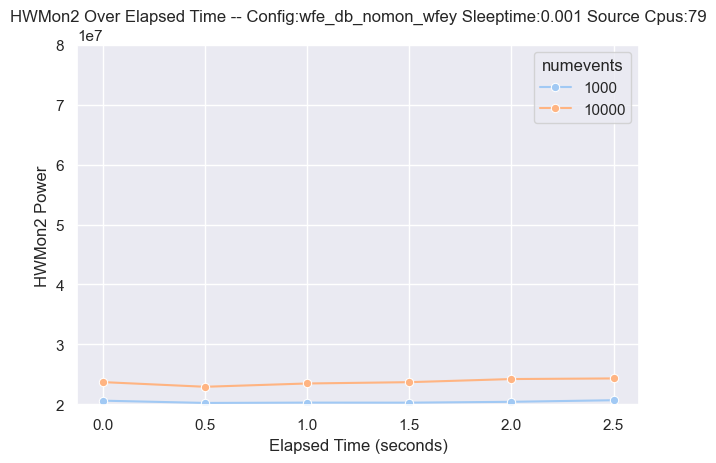

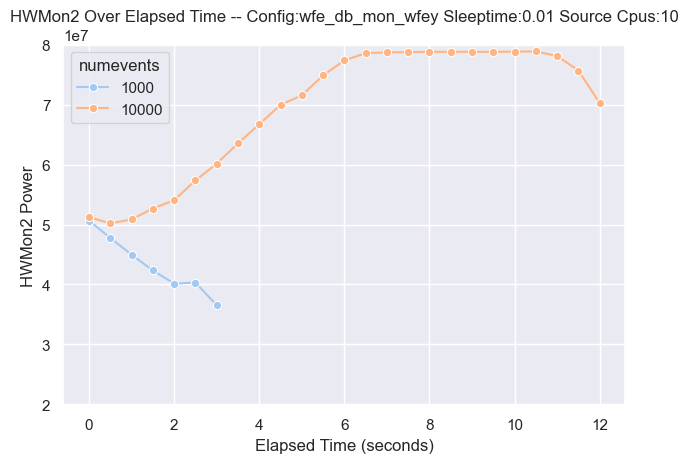

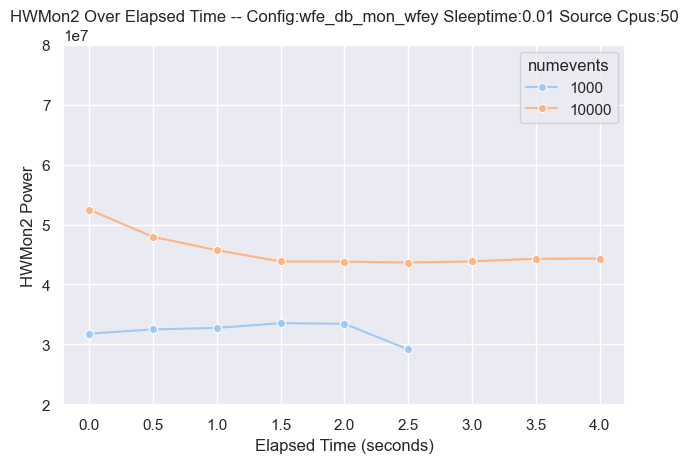

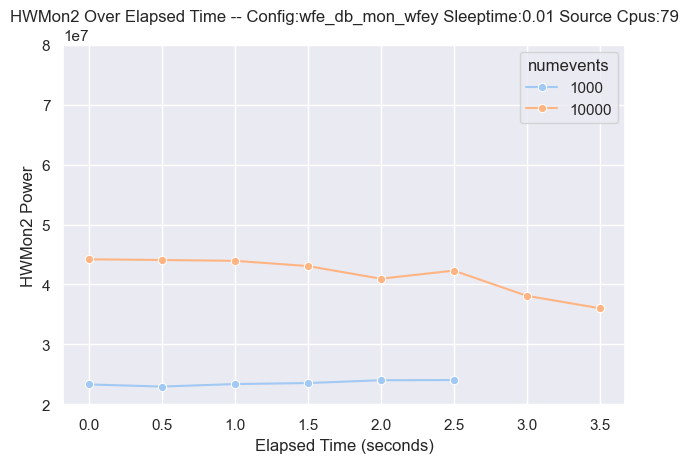

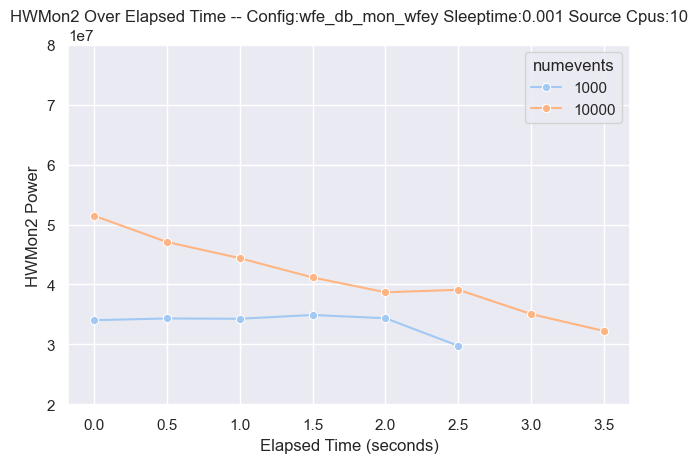

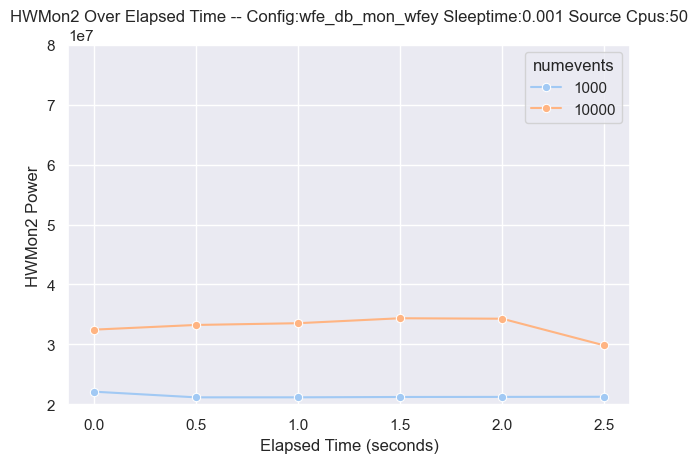

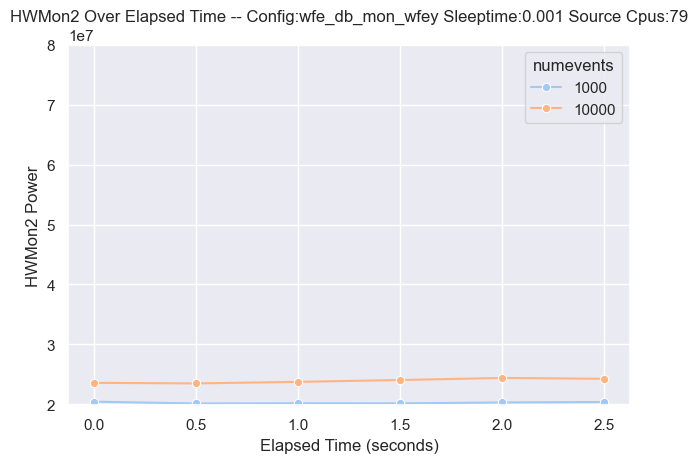

In [5]:
df_used = return_df(bm_output_flat_raw)

config_set = None

for c in CONFIGS:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['configs'] == c) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]

            sns.lineplot(
                data=config_set, 
                x='time',
                y='hwmon2',
                hue='numevents',
                palette='pastel',
                marker='o', 
                errorbar=None
            )
            
            plt.title('HWMon2 Over Elapsed Time -- Config:'+c+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Elapsed Time (seconds)')
            plt.ylabel('HWMon2 Power')
            plt.ylim(df_used['hwmon2_min'].min(),df_used['hwmon2_max'].max())
            plt.tight_layout()

##### Power values over time -- Differentiated by NumEvents -- Standarized 

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/17125263.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


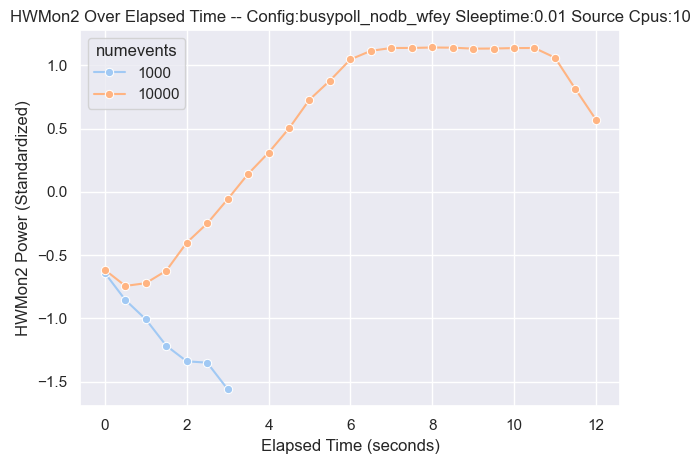

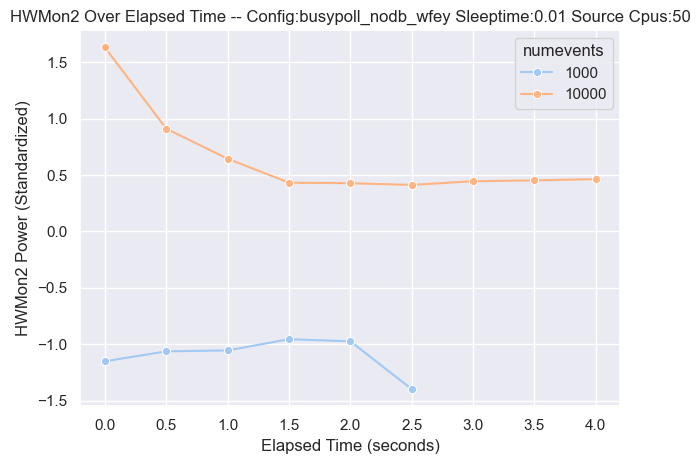

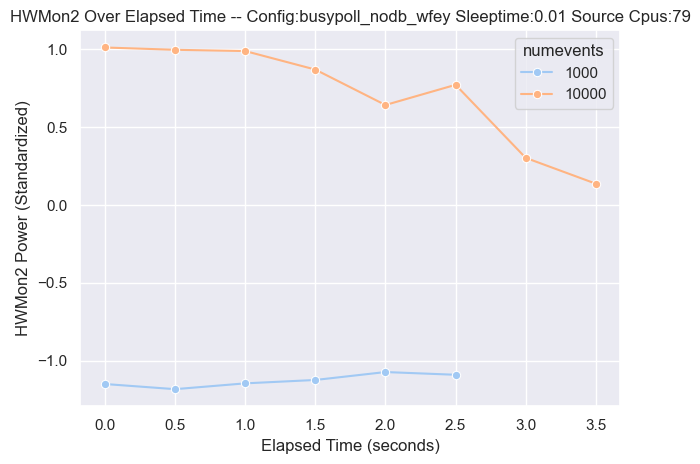

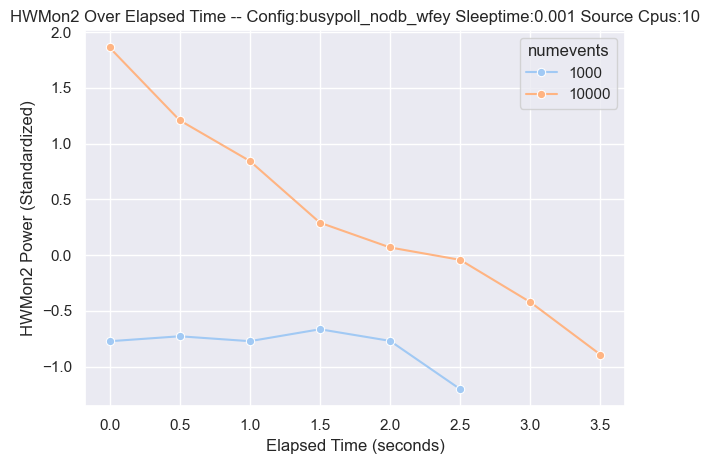

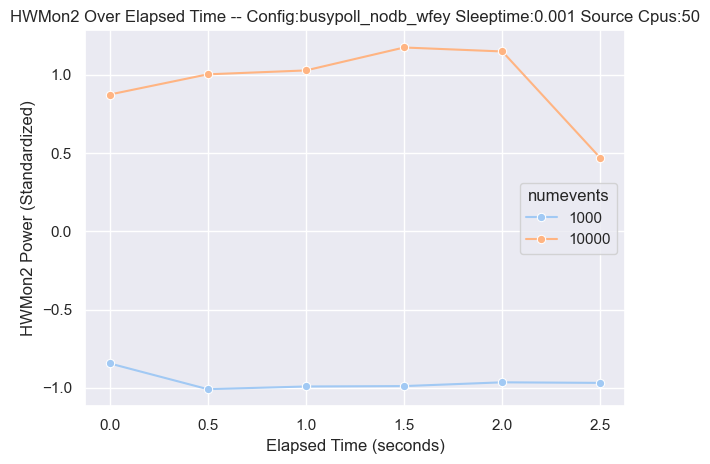

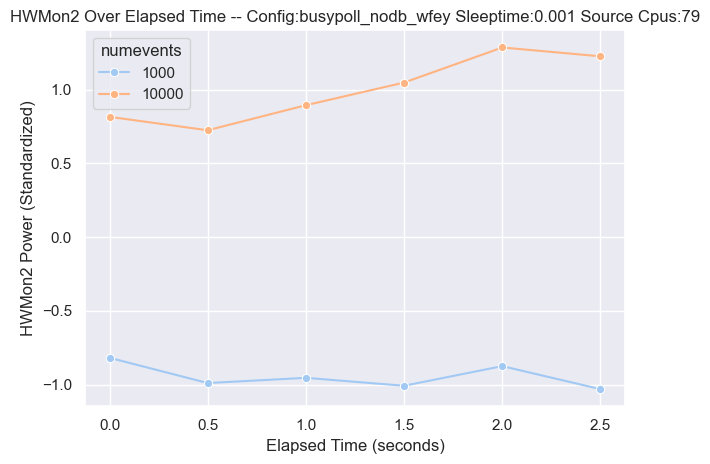

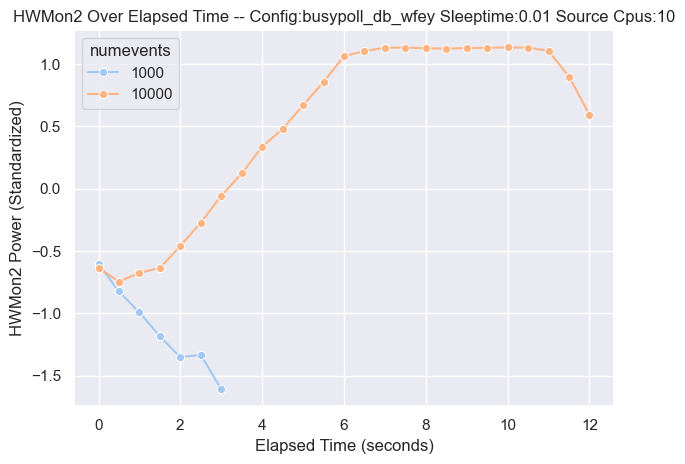

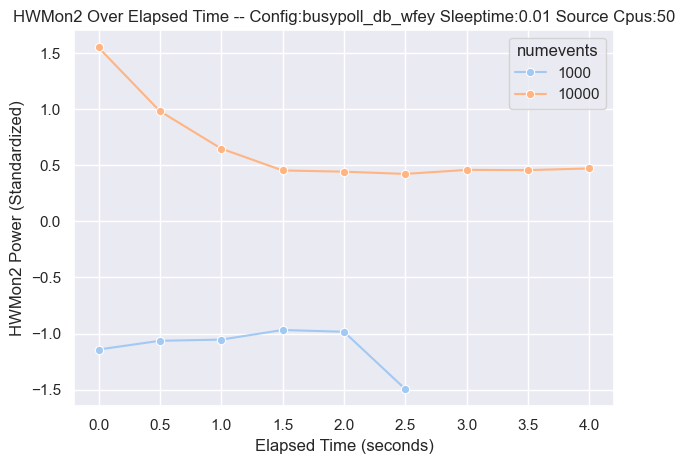

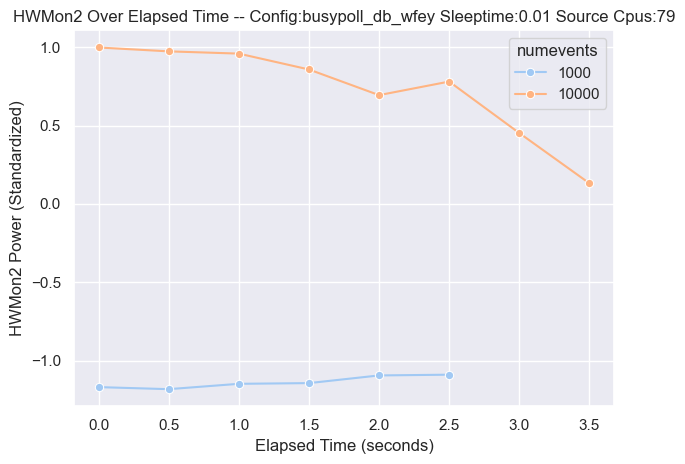

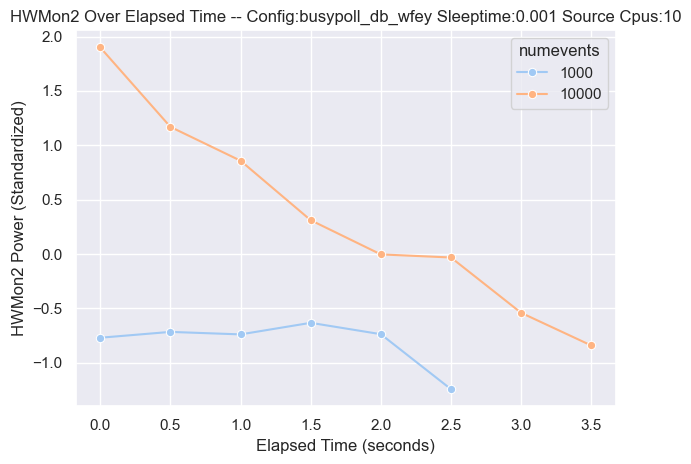

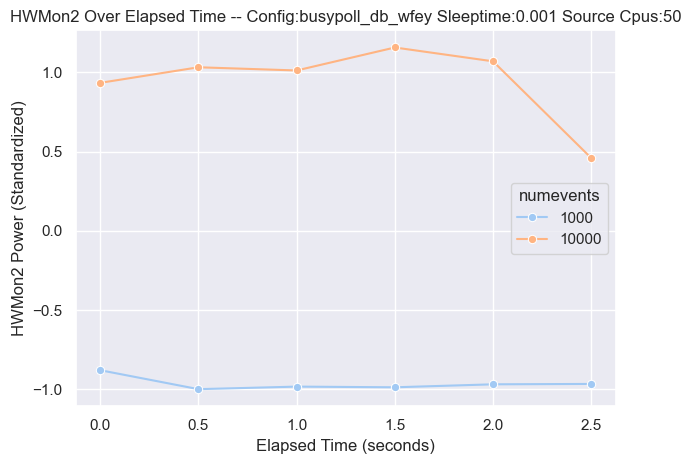

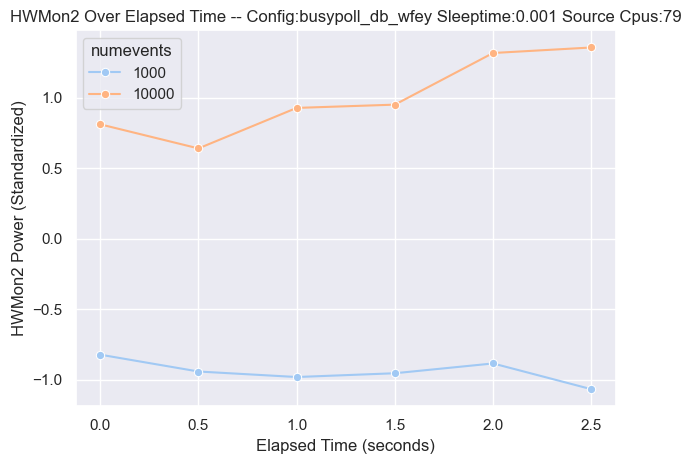

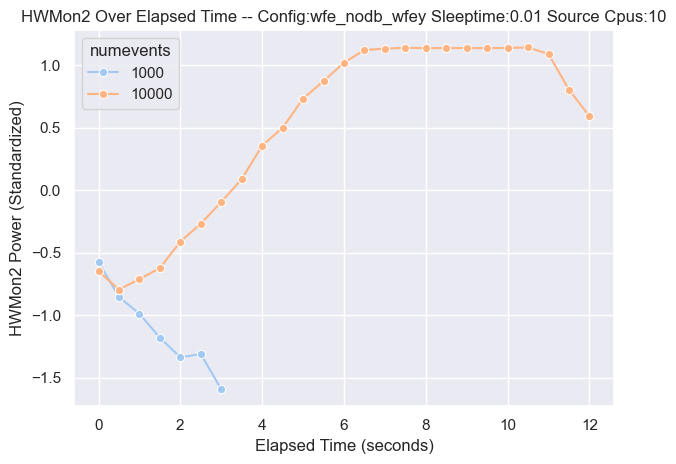

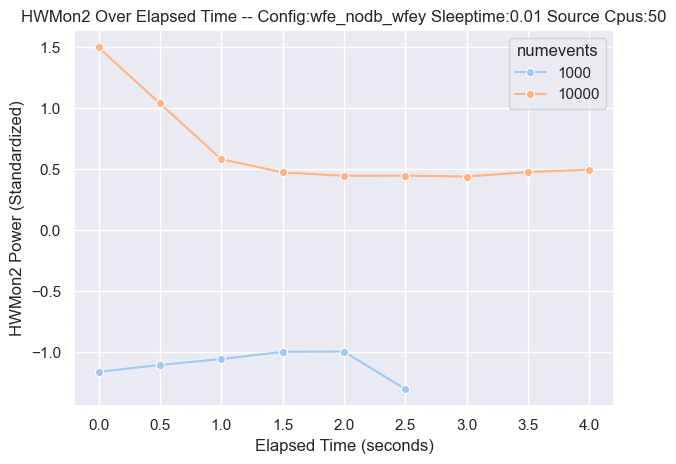

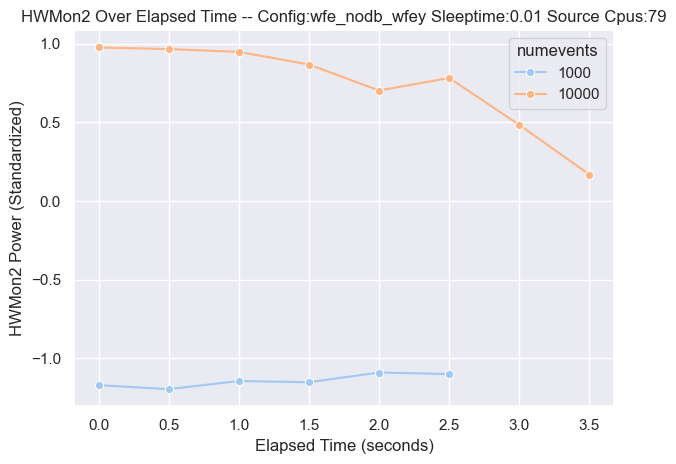

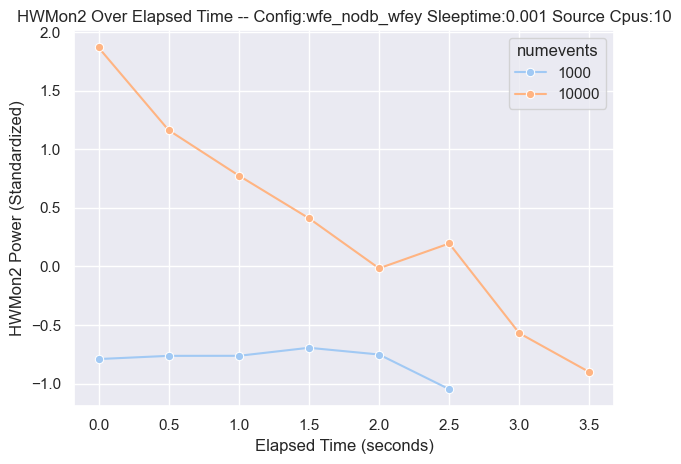

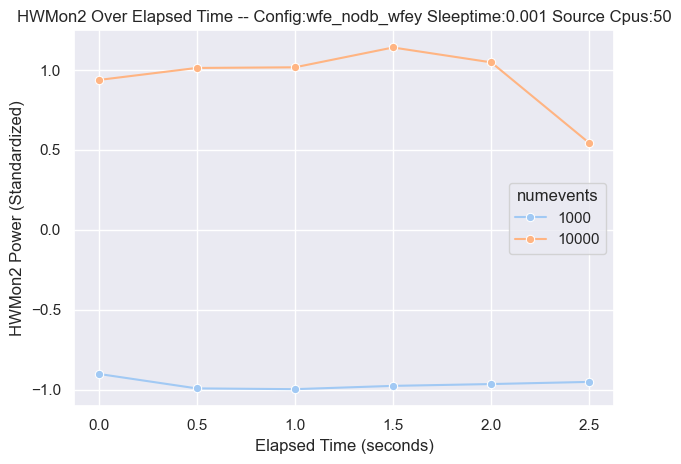

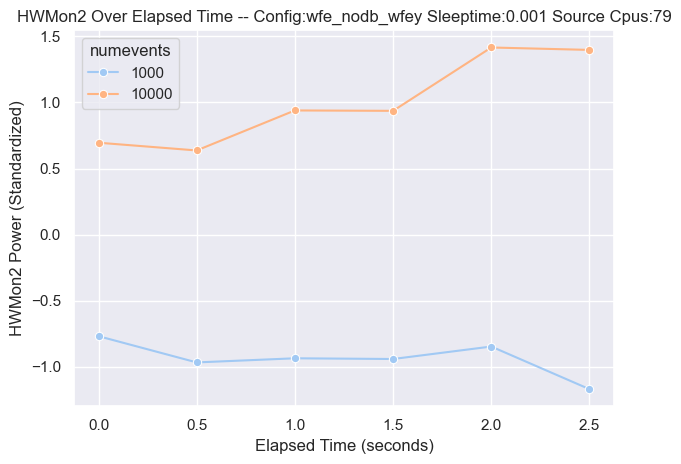

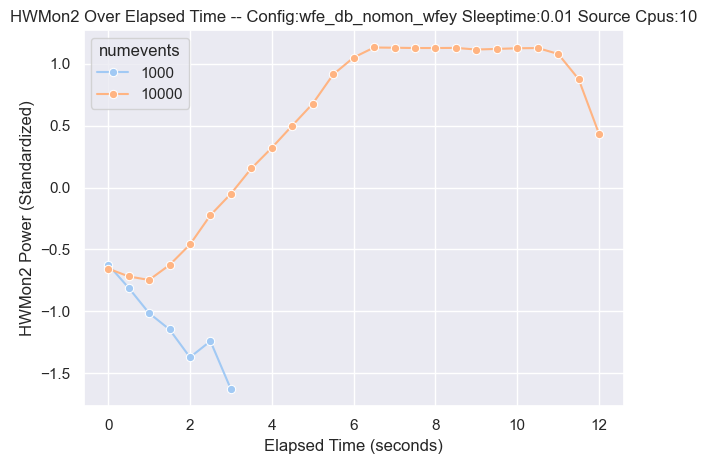

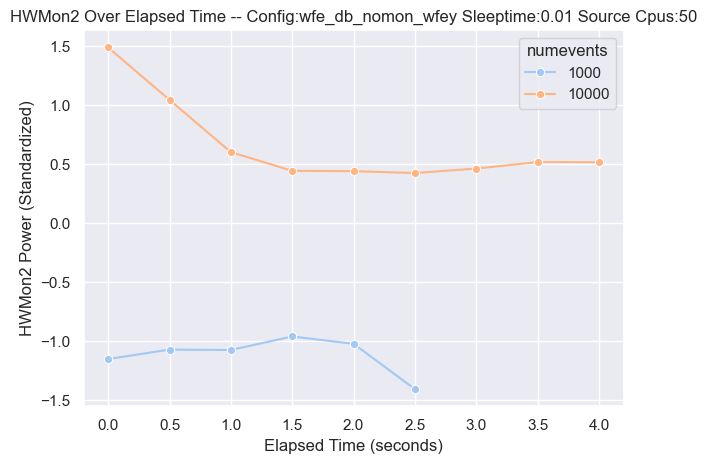

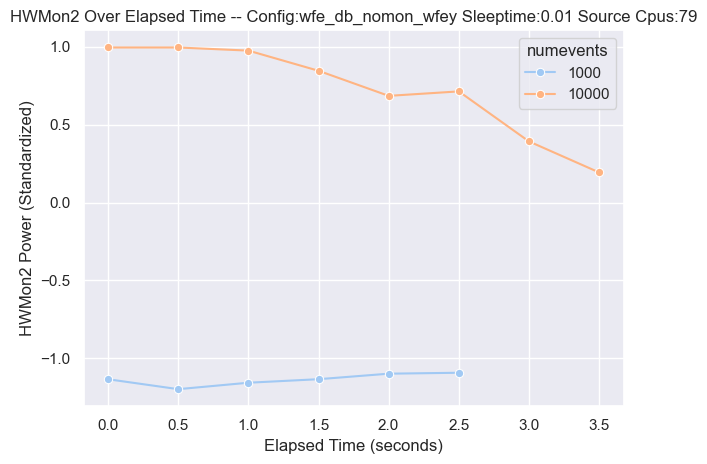

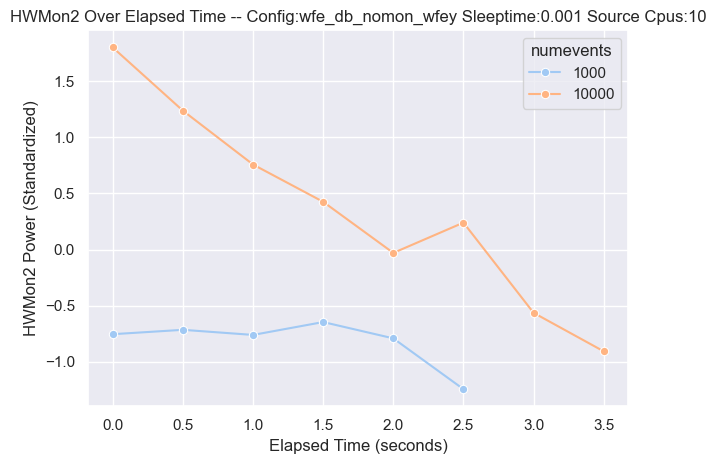

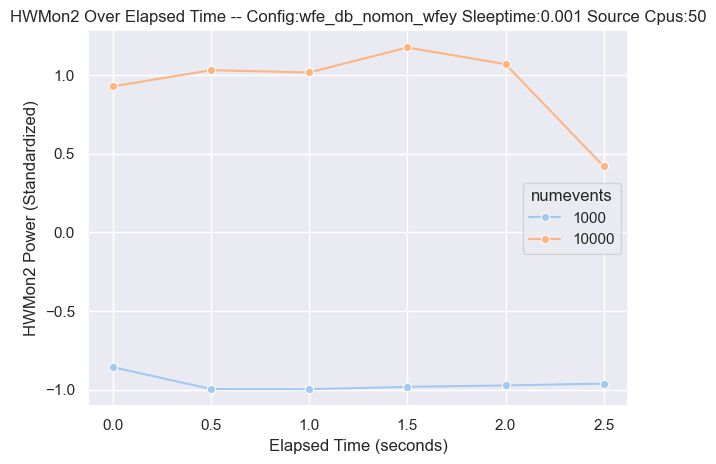

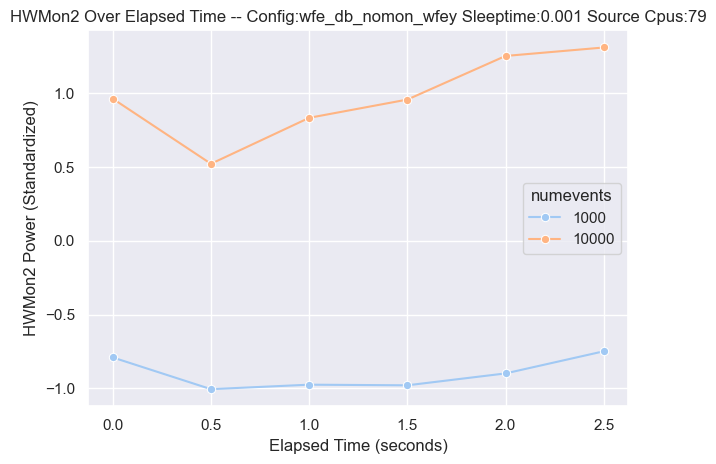

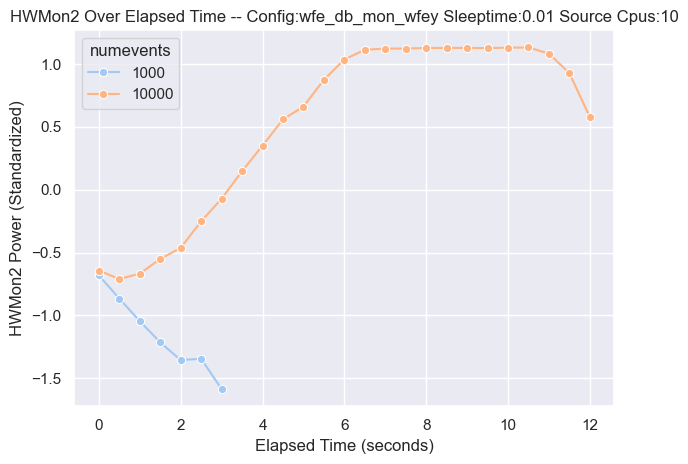

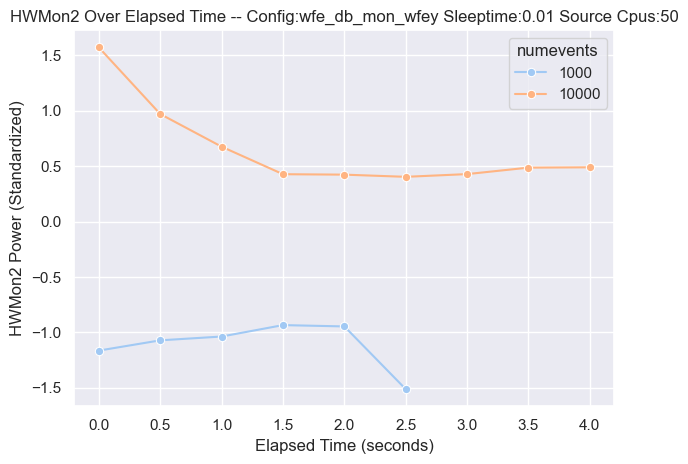

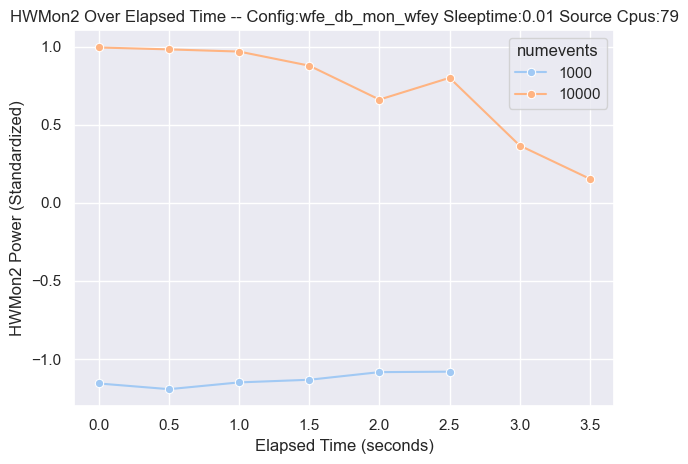

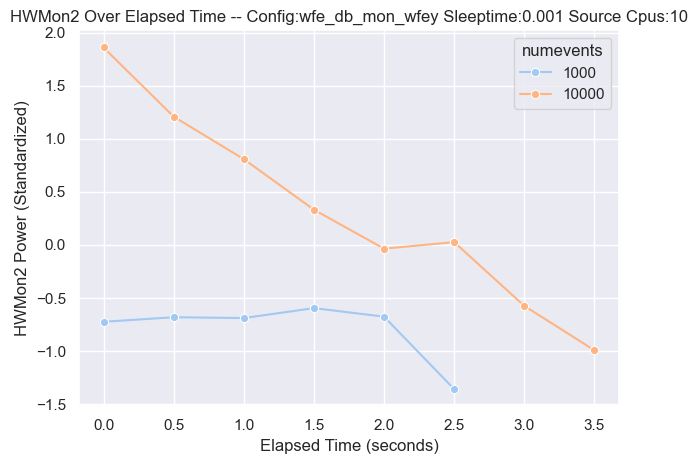

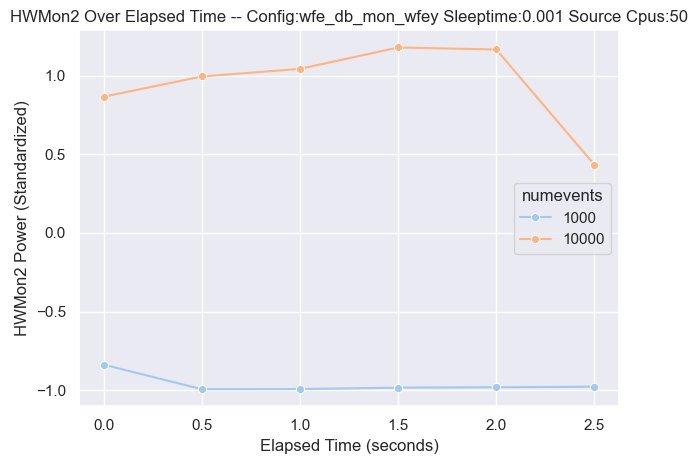

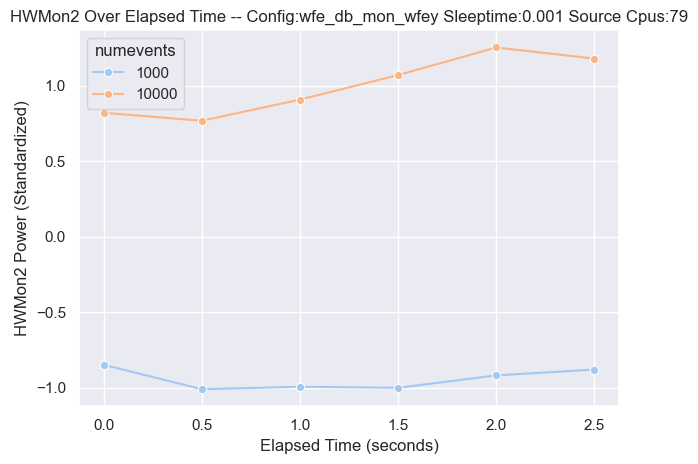

In [6]:
df_used = return_df(bm_output_flat_raw)
config_set = None

for c in CONFIGS:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['configs'] == c) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]
            
            mean_set = config_set.assign( hwmon2_standard = (config_set['hwmon2'] - config_set['hwmon2'].mean()) / (config_set['hwmon2'].std()) )
            
            sns.lineplot(
            data=mean_set, 
                x='time',
                y='hwmon2_standard',
                hue='numevents',
                palette='pastel',
                marker='o',       
                errorbar=None
            )
        
            plt.title('HWMon2 Over Elapsed Time -- Config:'+c+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Elapsed Time (seconds)')
            plt.ylabel('HWMon2 Power (Standardized)')
            plt.tight_layout()

##### Power values over time -- Differentiated by Config

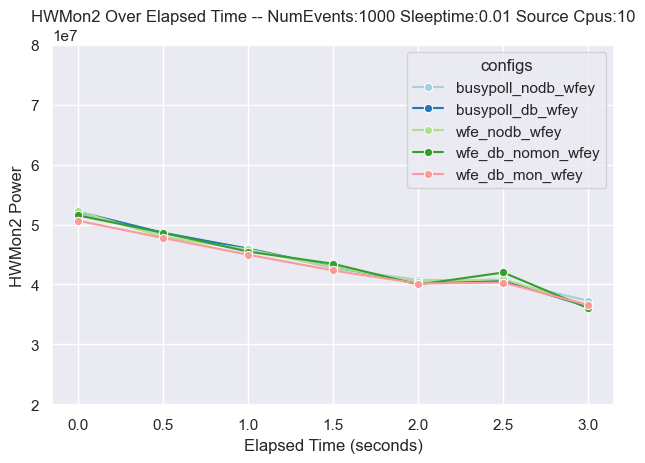

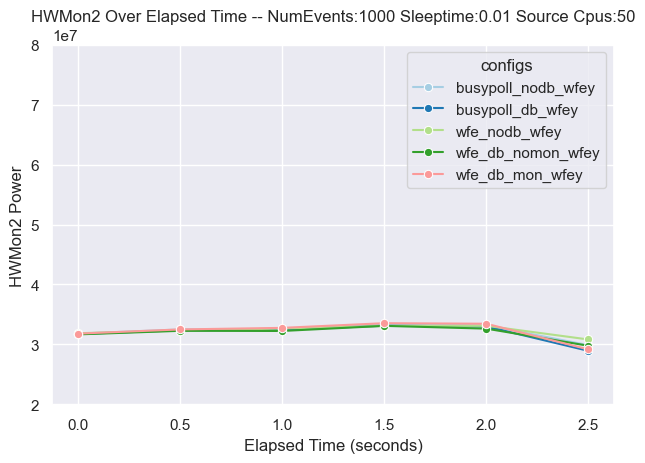

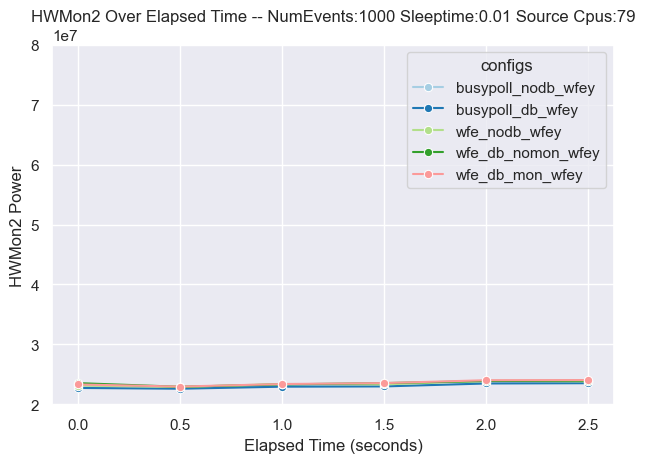

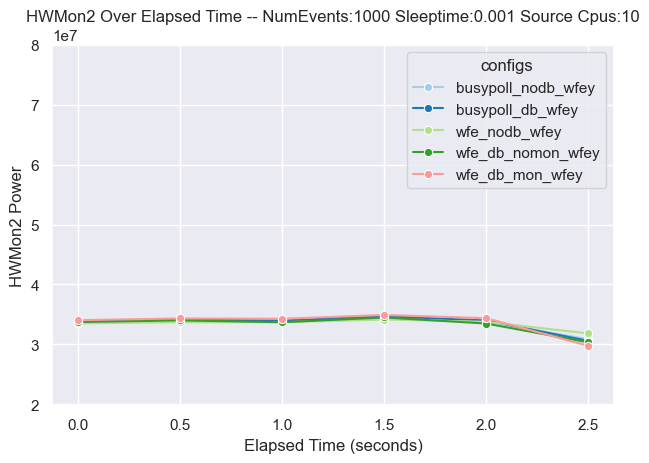

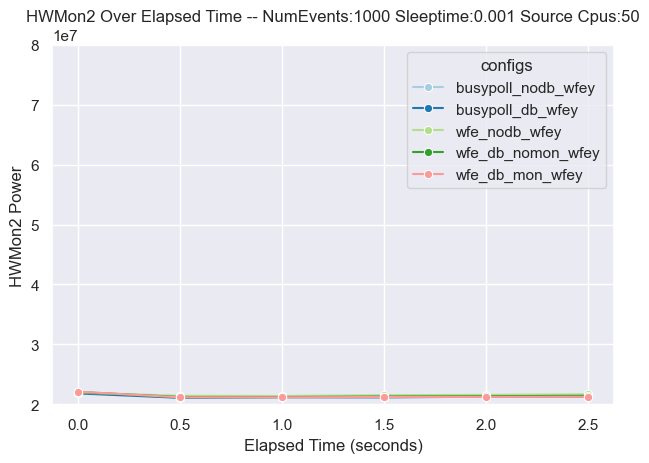

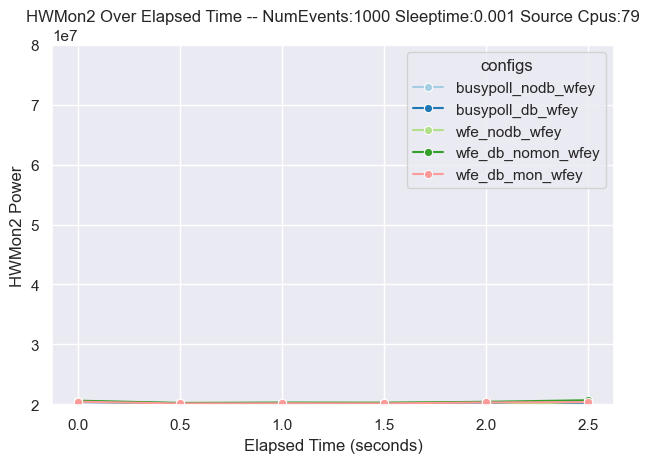

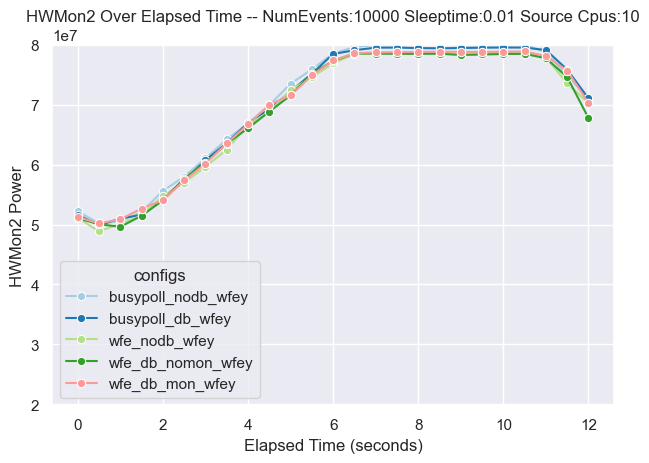

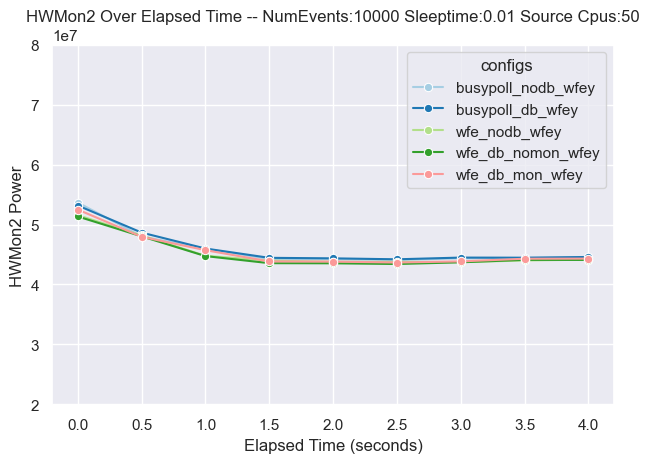

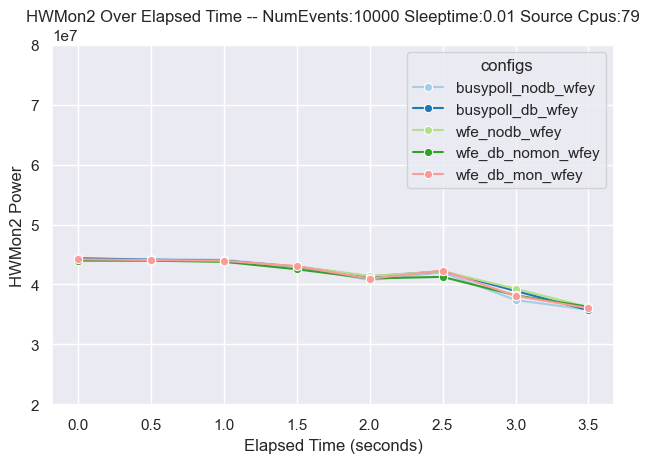

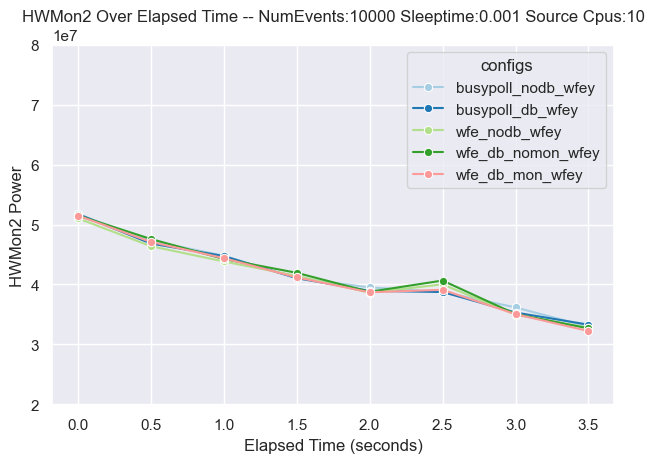

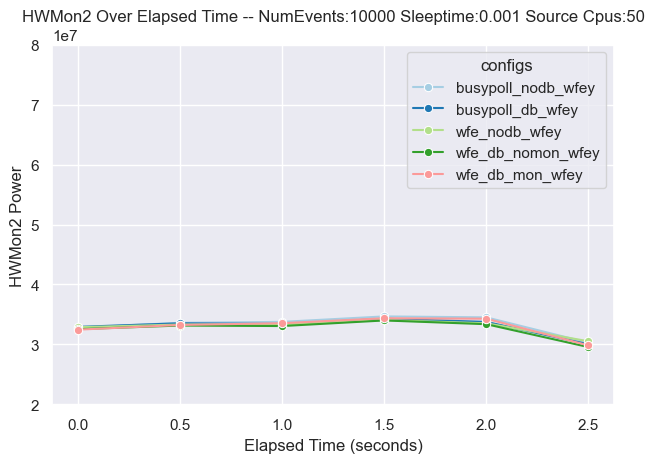

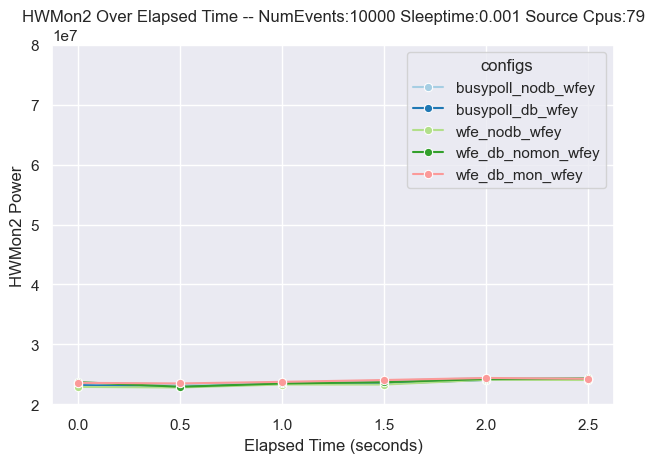

In [7]:
df_used = return_df(bm_output_flat_raw)
config_set = None

for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]

            sns.lineplot(
            data=config_set, 
                x='time',
                y='hwmon2',
                hue='configs',
                marker='o',        
                errorbar=None
            )
        
            plt.title('HWMon2 Over Elapsed Time -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Elapsed Time (seconds)')
            plt.ylabel('HWMon2 Power')
            plt.ylim(df_used['hwmon2'].min(),df_used['hwmon2'].max())
            plt.tight_layout()

##### Power values over time -- Differentiated by Config -- Standarized

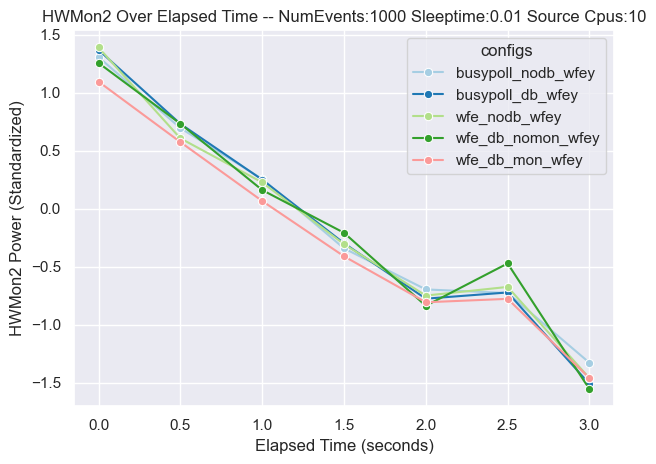

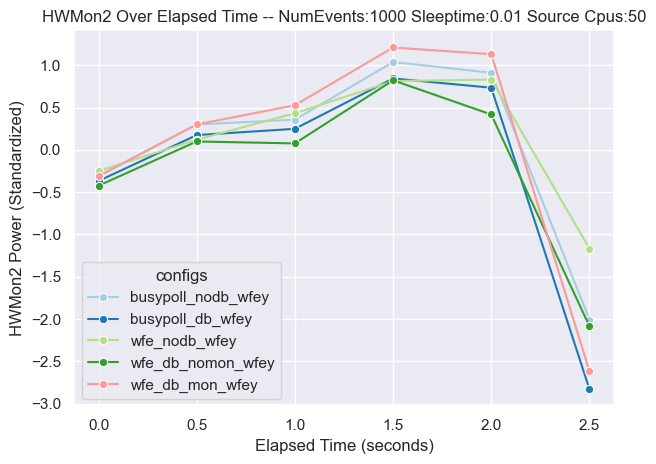

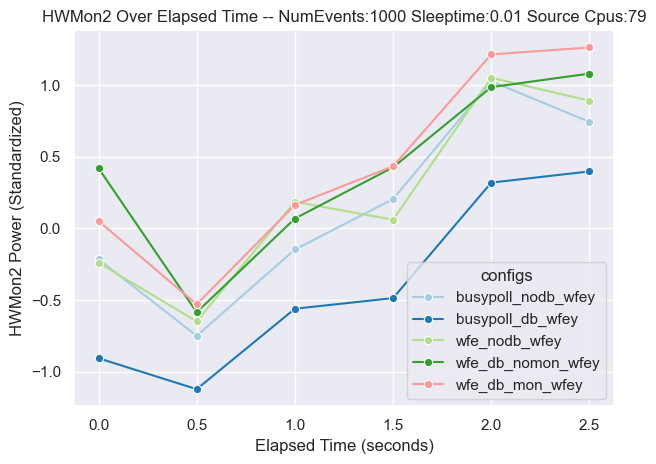

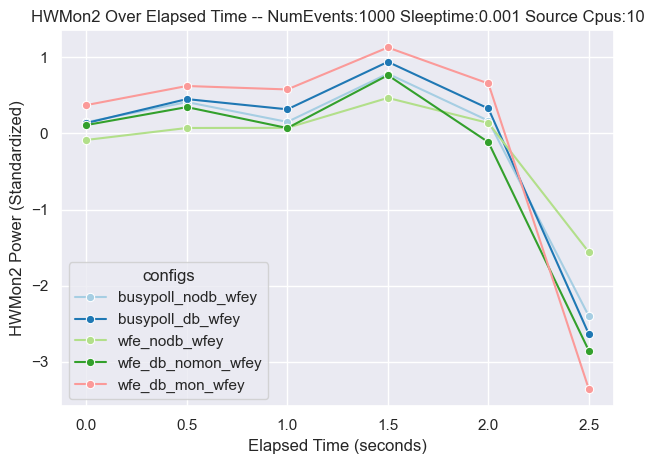

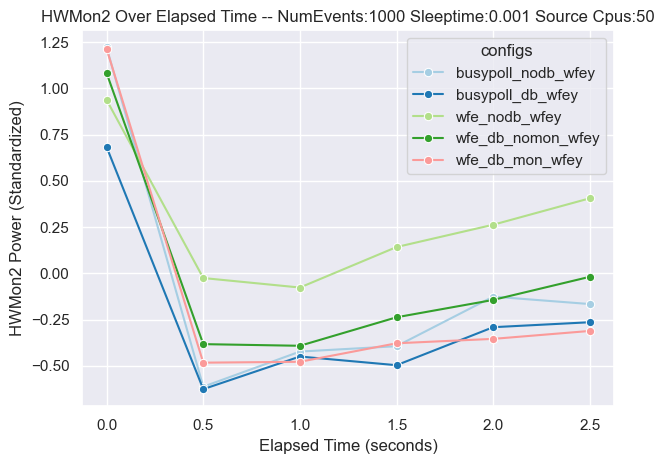

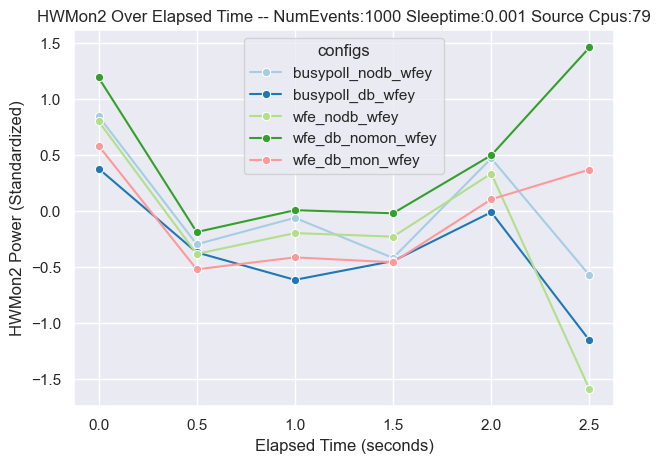

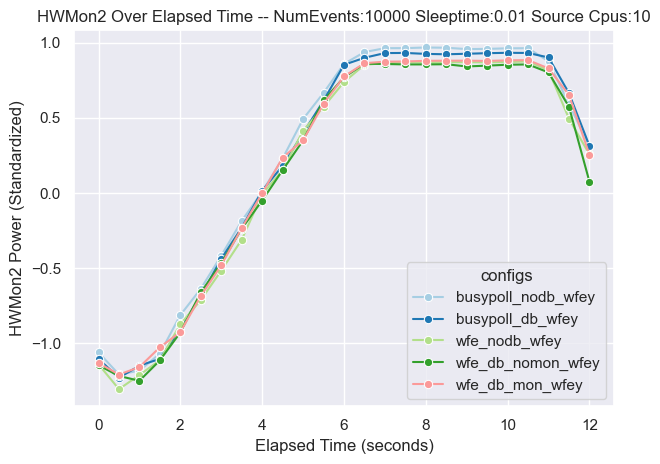

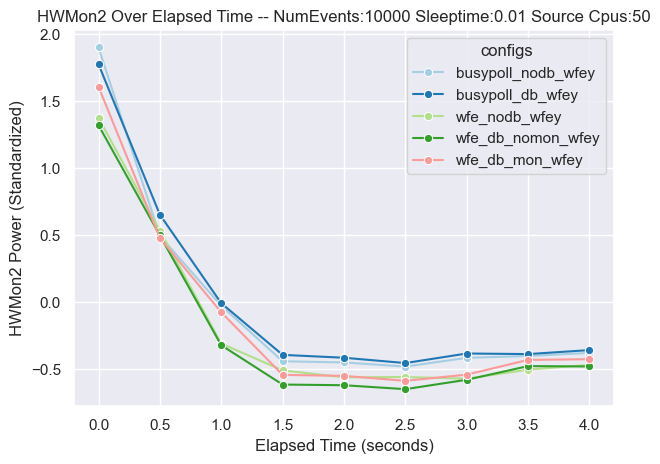

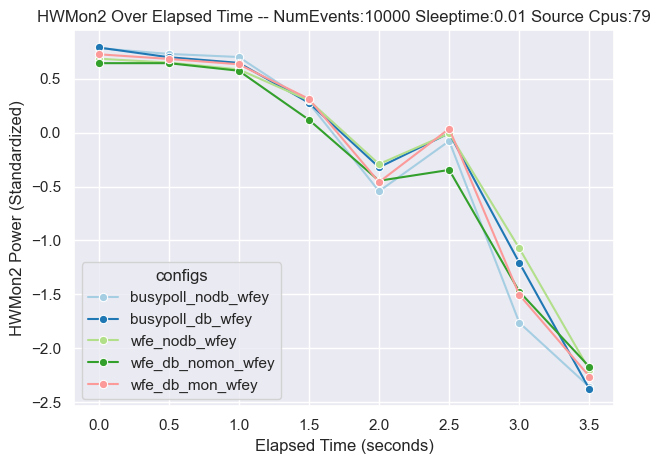

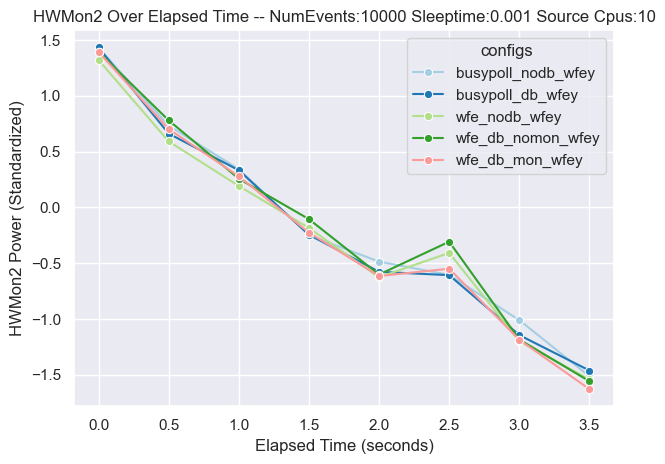

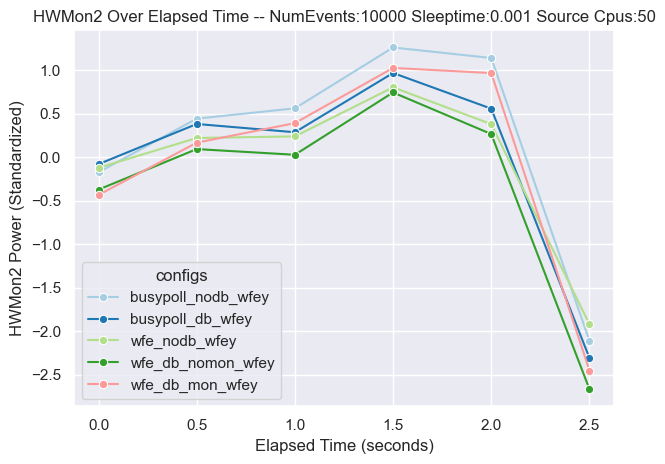

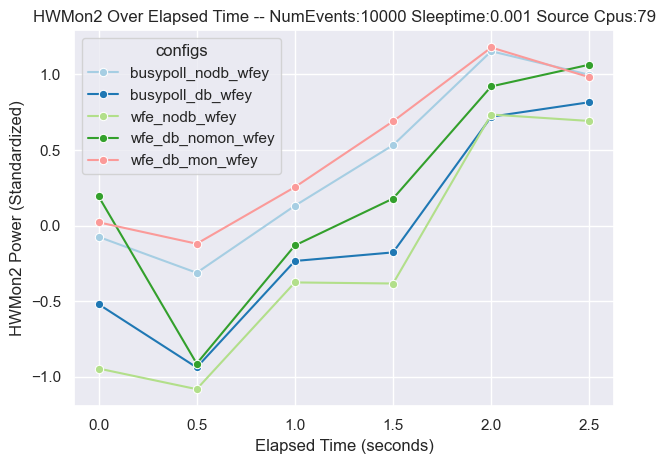

In [8]:
df_used = return_df(bm_output_flat_raw)
config_set = None

for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]
        
            ## Is this giving me the power numbers mean standardized (z-score) over all the values
            ## over one set of values ...? Do I want it over all of them... b/c they might start 
            ## at different values
            mean_set = config_set.assign( hwmon2_standard = (config_set['hwmon2'] - config_set['hwmon2'].mean()) / (config_set['hwmon2'].std()) )

            sns.lineplot(
                data=mean_set, 
                x='time',
                y='hwmon2_standard',
                hue='configs',
                marker='o',      
                errorbar=None
            )
        
            plt.title('HWMon2 Over Elapsed Time -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Elapsed Time (seconds)')
            plt.ylabel('HWMon2 Power (Standardized)')
            plt.tight_layout()

##### Min/Max/Mean per Config

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/2449215655.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

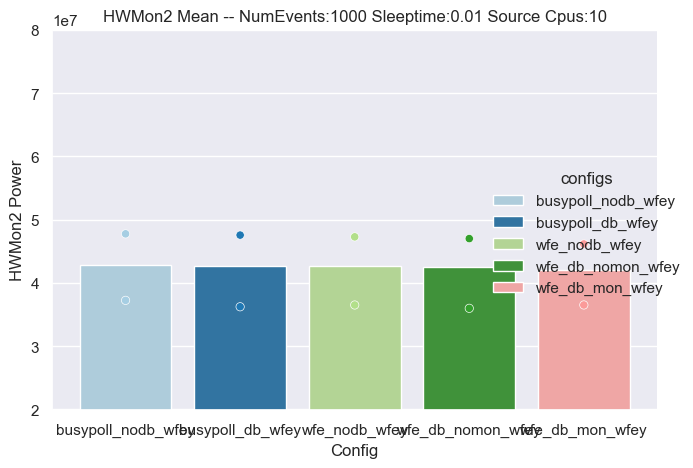

<Figure size 640x480 with 0 Axes>

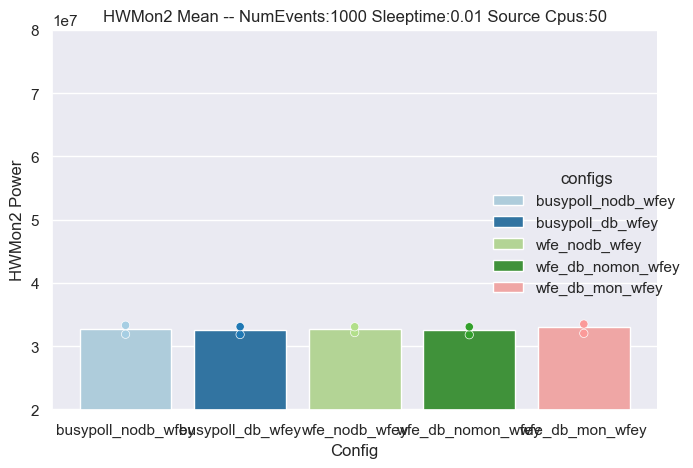

<Figure size 640x480 with 0 Axes>

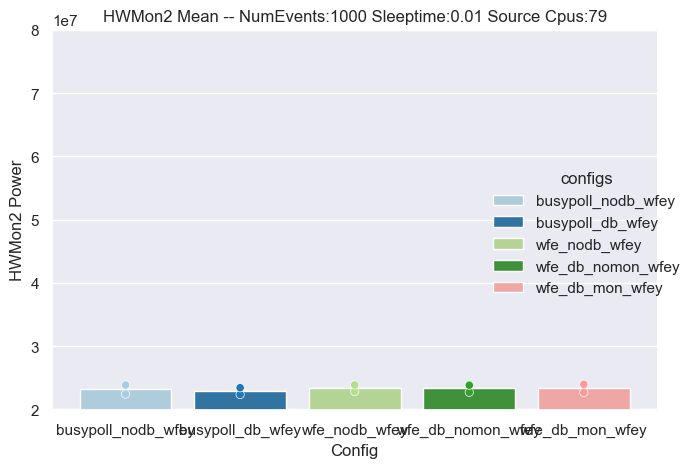

<Figure size 640x480 with 0 Axes>

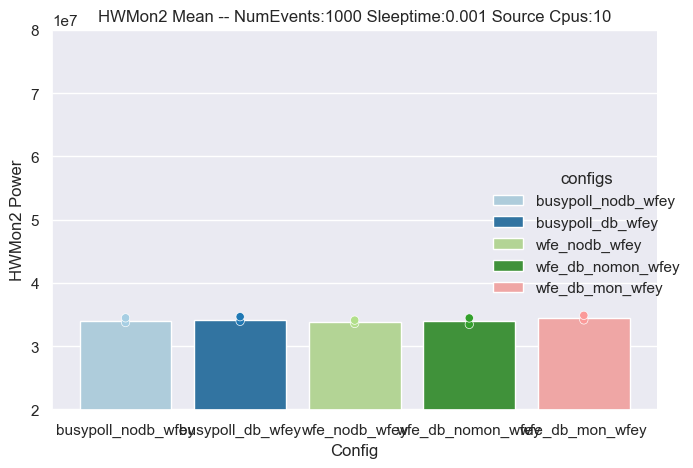

<Figure size 640x480 with 0 Axes>

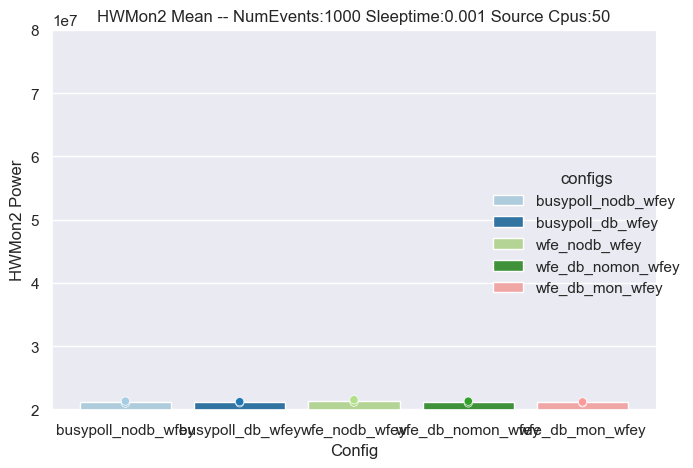

<Figure size 640x480 with 0 Axes>

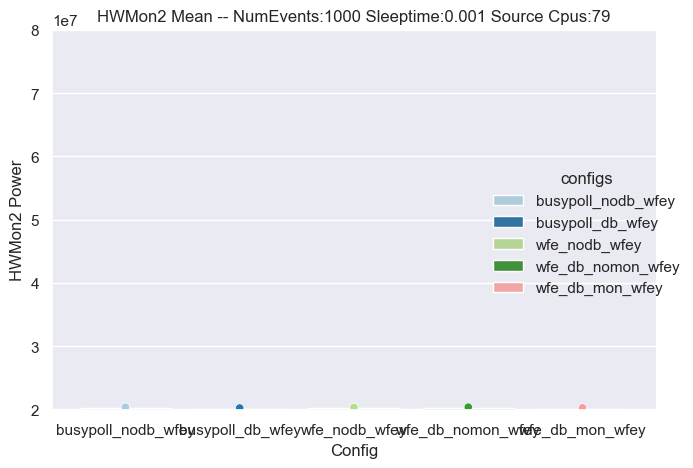

<Figure size 640x480 with 0 Axes>

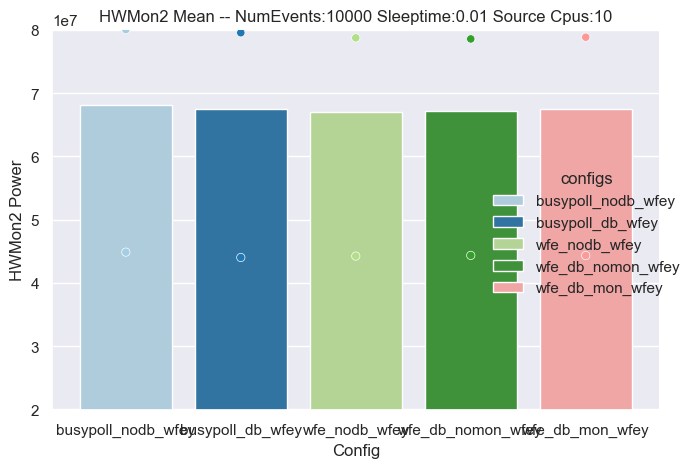

<Figure size 640x480 with 0 Axes>

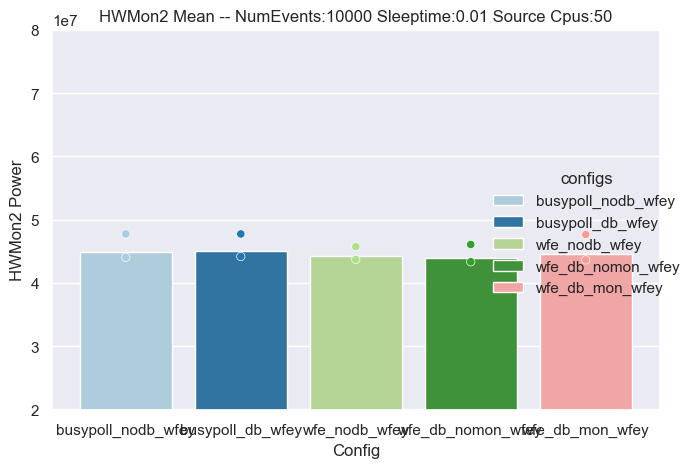

<Figure size 640x480 with 0 Axes>

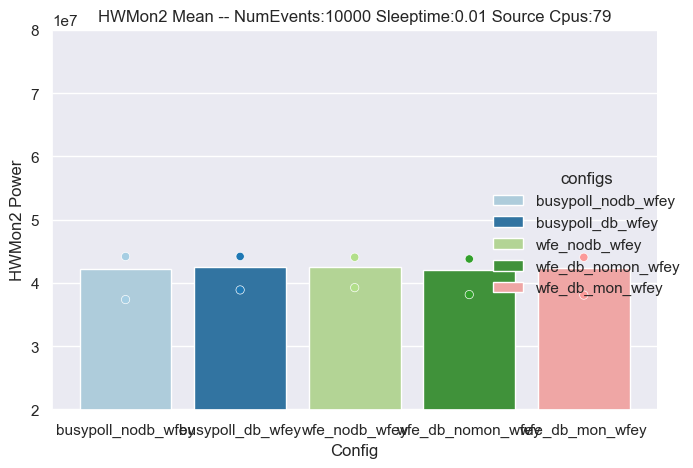

<Figure size 640x480 with 0 Axes>

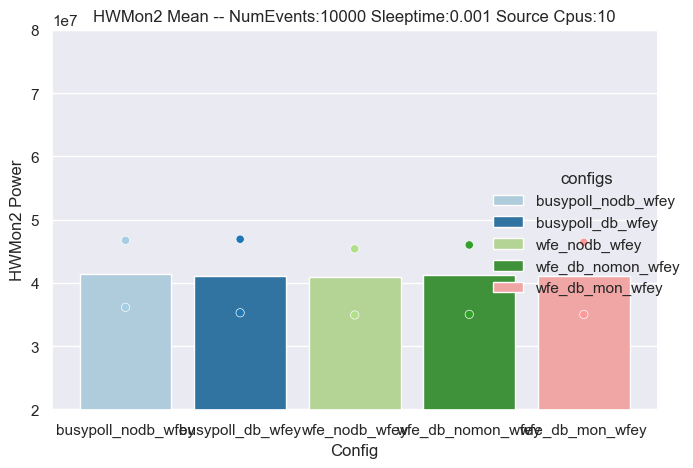

<Figure size 640x480 with 0 Axes>

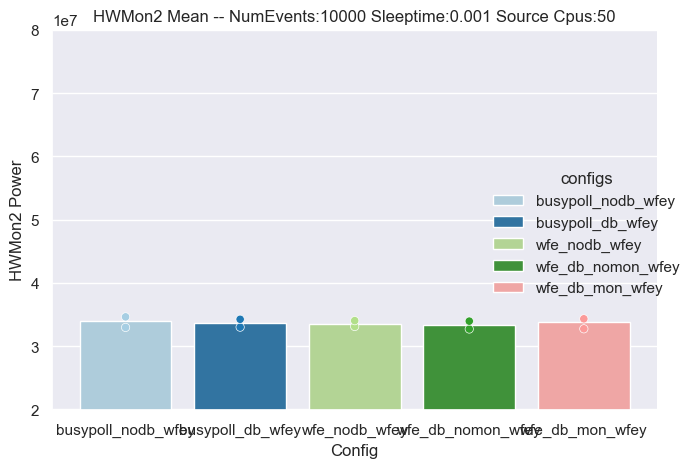

<Figure size 640x480 with 0 Axes>

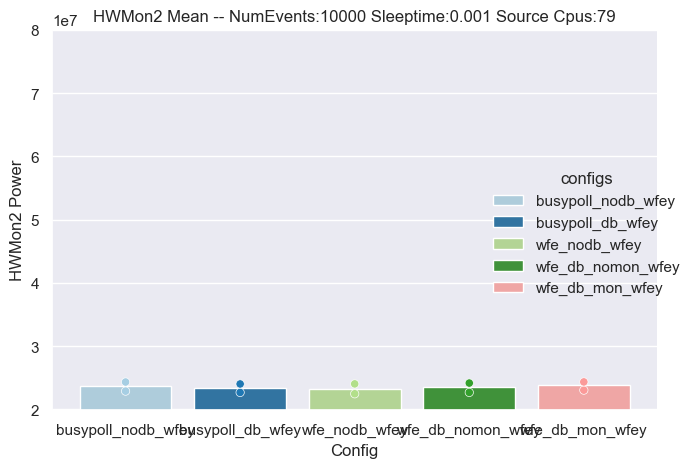

In [9]:
df_used = return_df(bm_output_clean)
config_set = None

for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]


            key = str(e)+"_"+str(s)+"_"+str(sc)
            
            try:
                g = sns.catplot(
                data=config_set, 
                kind="bar",
                x='configs',
                y='hwmon2_mean',
                hue='configs',
                legend=True,
                errorbar=None
                )
            except Exception as exc:
                print(f"{key}: {exc.__class__.__name__}")
                continue

            sns.scatterplot(
            data=config_set,
            x='configs',
            y='hwmon2_min',
            hue='configs',
            legend=False
            )

            sns.scatterplot(
            data=config_set,
            x='configs',
            y='hwmon2_max',
            hue='configs',
            legend=False
            )

            #g.fig.get_axes()[0].set_yscale('log')
        
            plt.title('HWMon2 Mean -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Config')
            plt.ylabel('HWMon2 Power')
            plt.ylim(df_used['hwmon2_min'].min(),df_used['hwmon2_max'].max()) # use this to arg set per config
            #plt.ylim(config_set['hwmon2_min'].min(),config_set['hwmon2_max'].max()) # use this to compare the configs per arg set
            plt.tight_layout()

##### Power Differences

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/2607611861.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

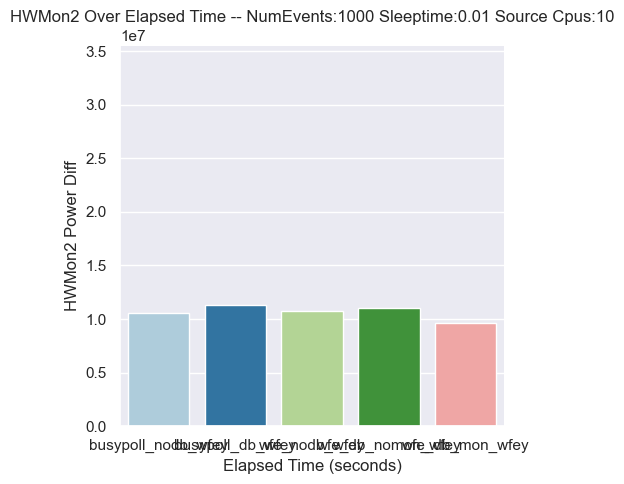

<Figure size 640x480 with 0 Axes>

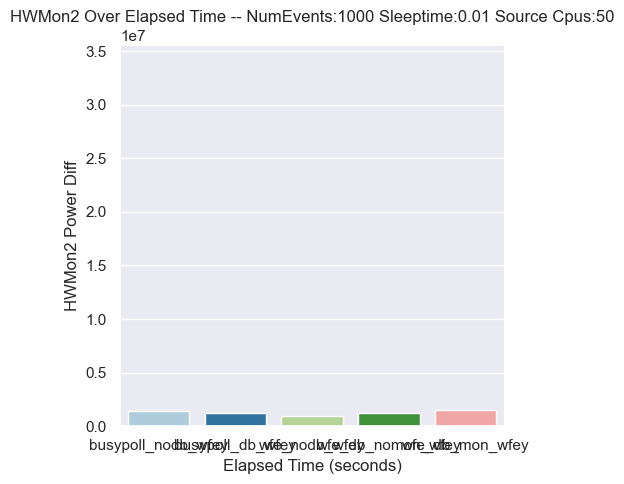

<Figure size 640x480 with 0 Axes>

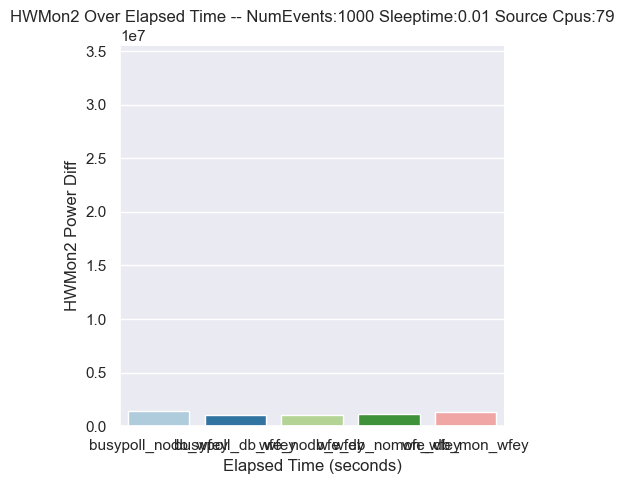

<Figure size 640x480 with 0 Axes>

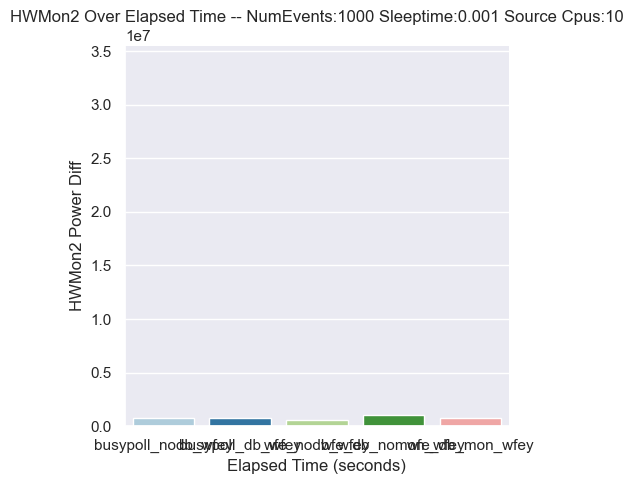

<Figure size 640x480 with 0 Axes>

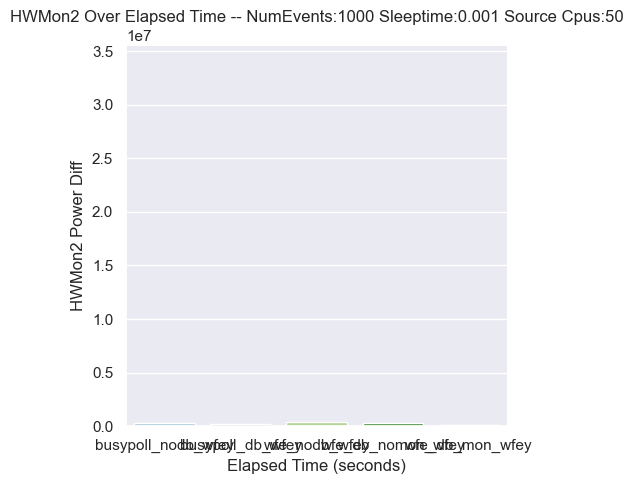

<Figure size 640x480 with 0 Axes>

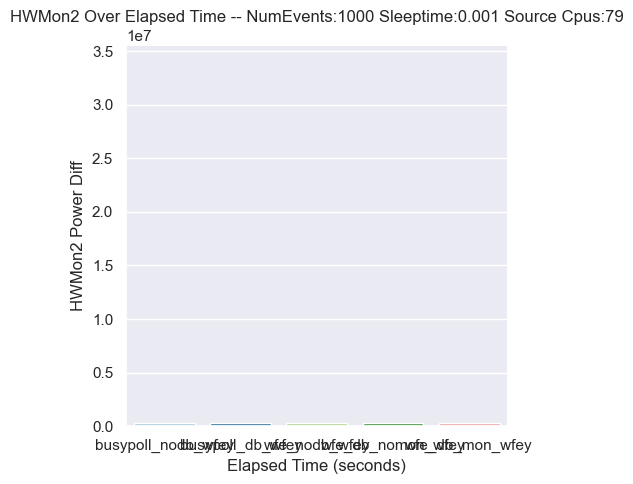

<Figure size 640x480 with 0 Axes>

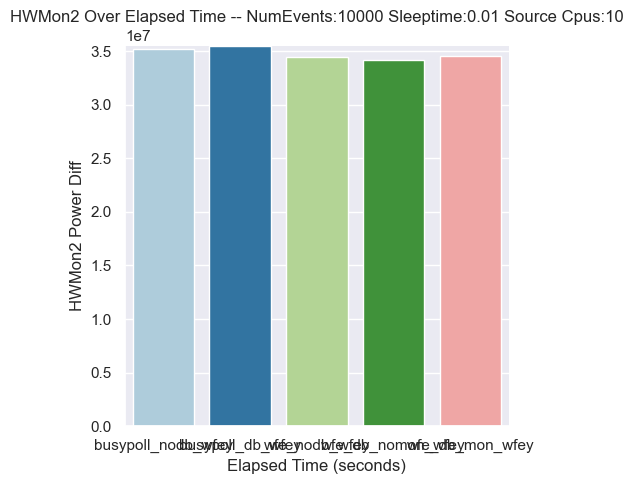

<Figure size 640x480 with 0 Axes>

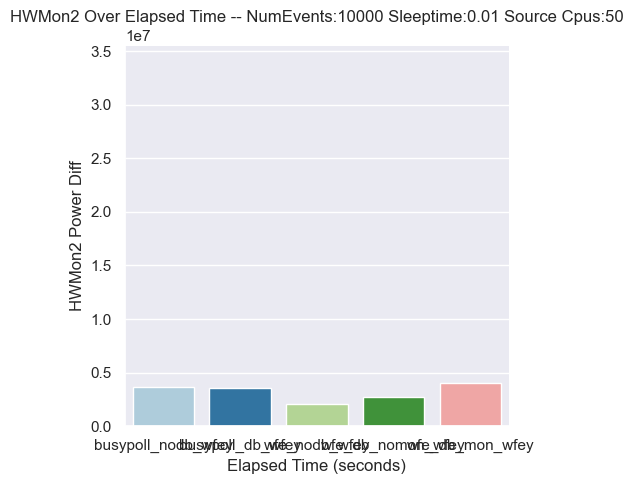

<Figure size 640x480 with 0 Axes>

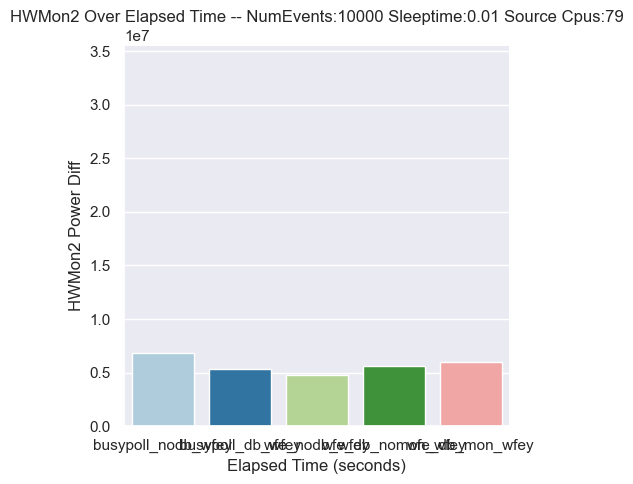

<Figure size 640x480 with 0 Axes>

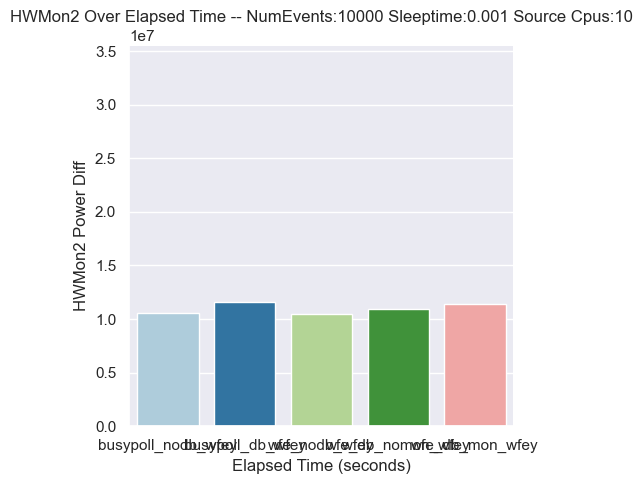

<Figure size 640x480 with 0 Axes>

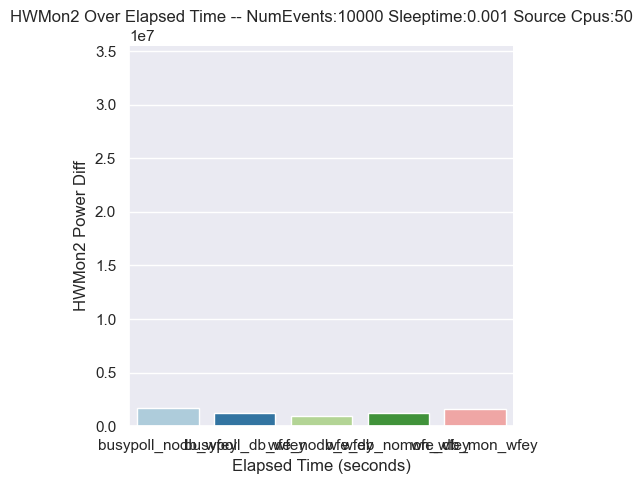

<Figure size 640x480 with 0 Axes>

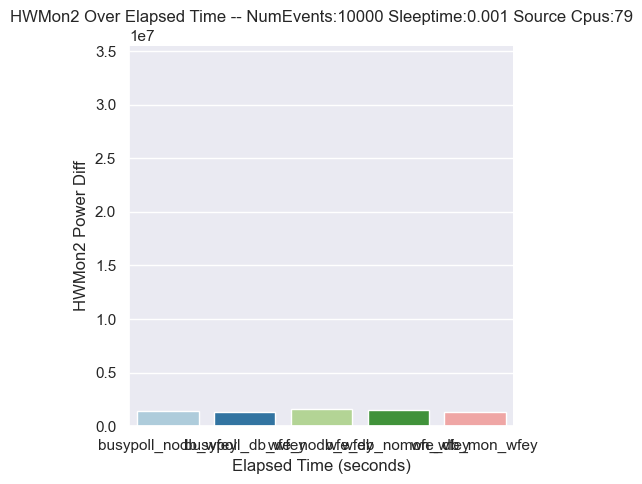

In [10]:
df_used = return_df(bm_output_clean)
config_set = None

total_diff_set = df_used.assign( hwmon2_diff = df_used['hwmon2_max'] - df_used['hwmon2_min'] )

for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]
            diff_set = config_set.assign( hwmon2_diff = config_set['hwmon2_max'] - config_set['hwmon2_min'] )

            sns.catplot(
                data=diff_set, 
                kind="bar",
                x='configs',
                y='hwmon2_diff',
                hue='configs',
                errorbar=None
            )
        
            plt.title('HWMon2 Over Elapsed Time -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Elapsed Time (seconds)')
            plt.ylabel('HWMon2 Power Diff')
            plt.ylim(0,total_diff_set['hwmon2_diff'].max())
            plt.tight_layout()

##### Total Watts Used

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/604842848.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

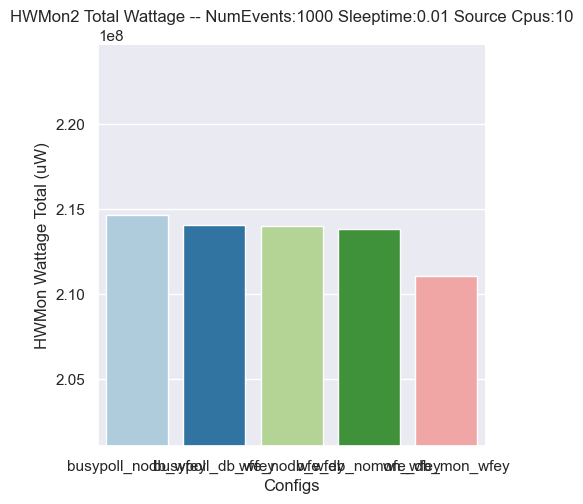

<Figure size 640x480 with 0 Axes>

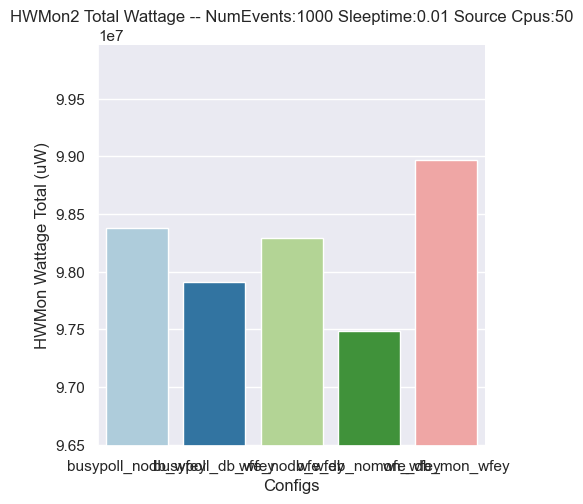

<Figure size 640x480 with 0 Axes>

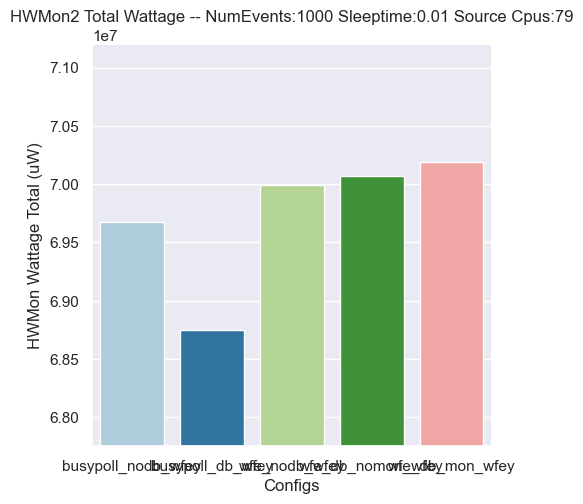

<Figure size 640x480 with 0 Axes>

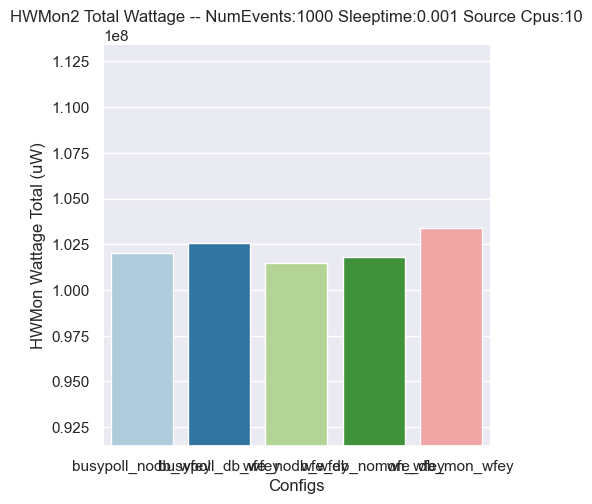

<Figure size 640x480 with 0 Axes>

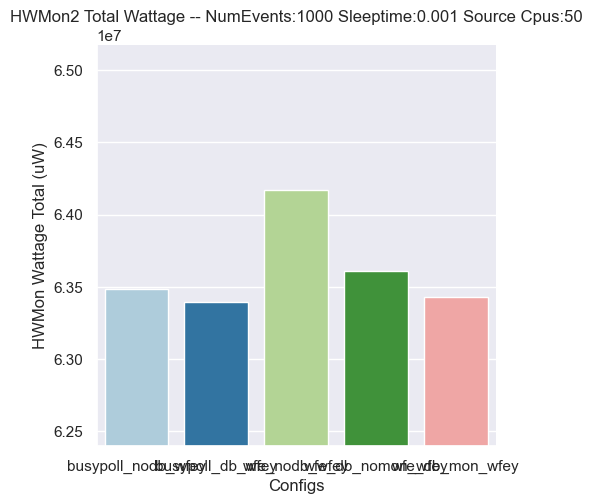

<Figure size 640x480 with 0 Axes>

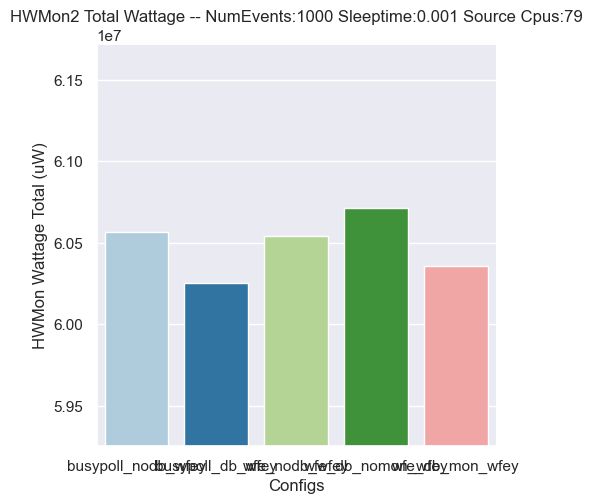

<Figure size 640x480 with 0 Axes>

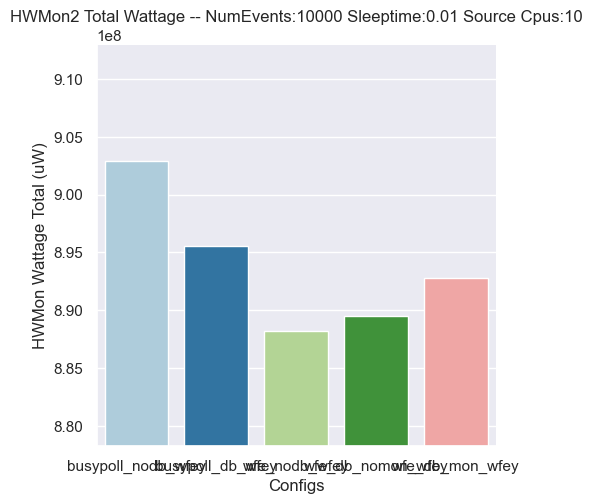

<Figure size 640x480 with 0 Axes>

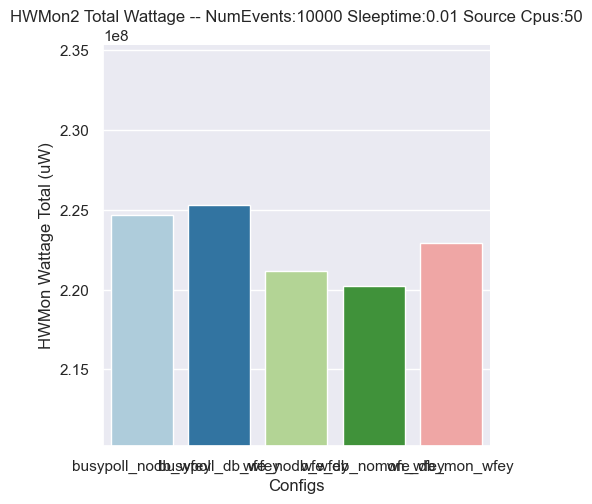

<Figure size 640x480 with 0 Axes>

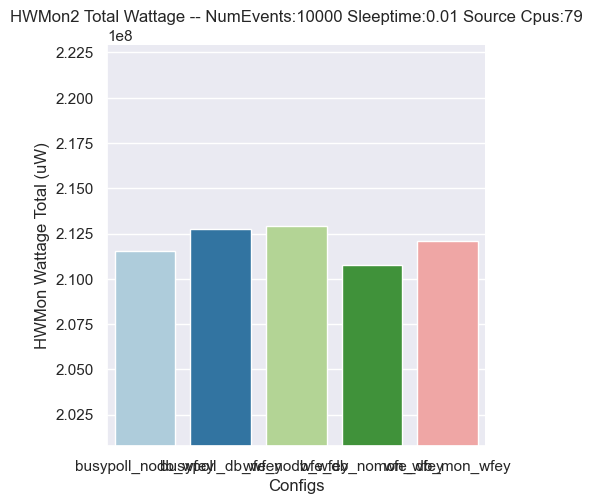

<Figure size 640x480 with 0 Axes>

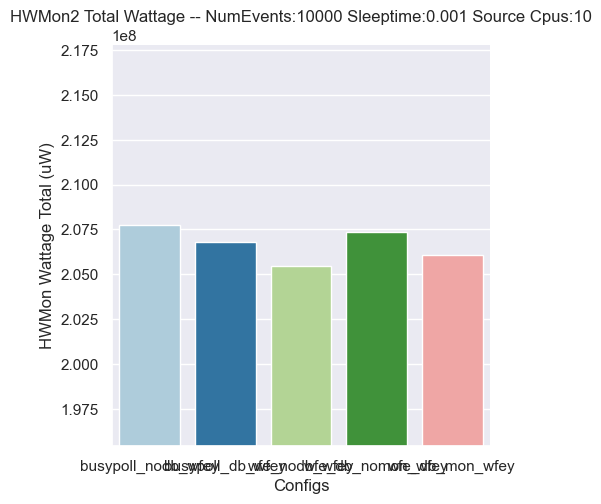

<Figure size 640x480 with 0 Axes>

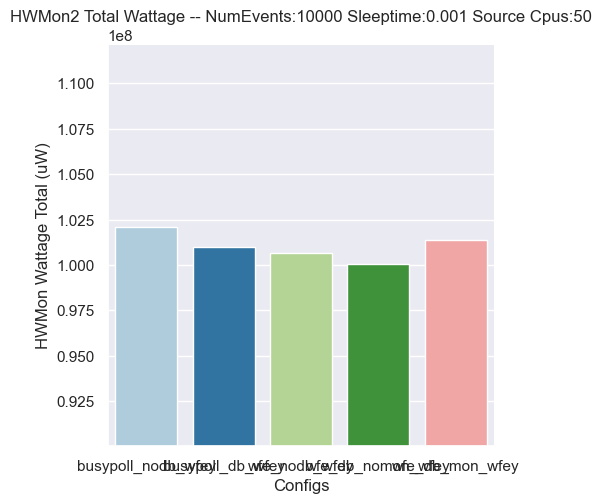

<Figure size 640x480 with 0 Axes>

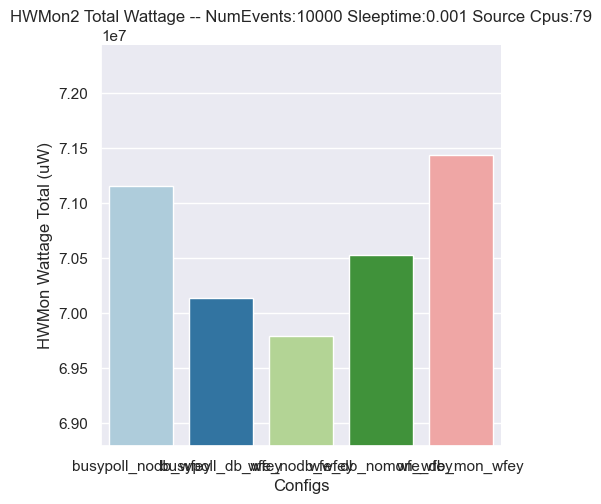

In [11]:
df_used = return_df(bm_output_clean)

total_sum_set = df_used.assign( hwmon2_total = [sum(x) for x in df_used['hwmon2']] )


for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            config_set = None
            plt.figure()
            
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]

            if config_set.empty:
                key = str(e)+"_"+str(s)+"_"+str(sc)
                print(key, "is empty! SKIPPING")
                continue

            sum_set = config_set.copy()
            sum_set['hwmon2_total'] =config_set['hwmon2'].apply(sum)

            sns.catplot(
                data=sum_set, 
                kind="bar",
                x='configs',
                y='hwmon2_total',
                hue='configs',
                errorbar=None
            )
            
            min_y = sum_set['hwmon2_total'].min()
            #min_y = total_sum_set['hwmon2_total'].min()
            max_y = sum_set['hwmon2_total'].max()
            #max_y = total_sum_set['hwmon2_total'].max()
            mindim = 10**(int(math.log10(min_y))-1)
            maxdim = 10**(int(math.log10(max_y))-1)

            plt.title('HWMon2 Total Wattage -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Configs')
            plt.ylabel('HWMon Wattage Total (uW)')
            plt.ylim(min_y-mindim, max_y+maxdim)
            #plt.tight_layout()
            #plt.figure(figsize=(6, 4))

#### Latency Graphs

##### Choosing subsets of plots

In [12]:
sns.set_palette("Paired")
pd.options.mode.chained_assignment = None

eventsubset=[1000, 10000]
sleeptimesubset=["0.01","0.001"]
sourceCPUsubset=["10", "50", "79"]

def return_df(df):
    return df[ (df['numevents'].isin(eventsubset)) & (df['sleeptime'].isin(sleeptimesubset)) & (df['sourceCPUs'].isin(sourceCPUsubset))].copy()

df_used = return_df(bm_output_clean)

#### Average Latency Numbers across all arg configs for each wfey Config

<Axes: xlabel='numevents', ylabel='latency_mean'>

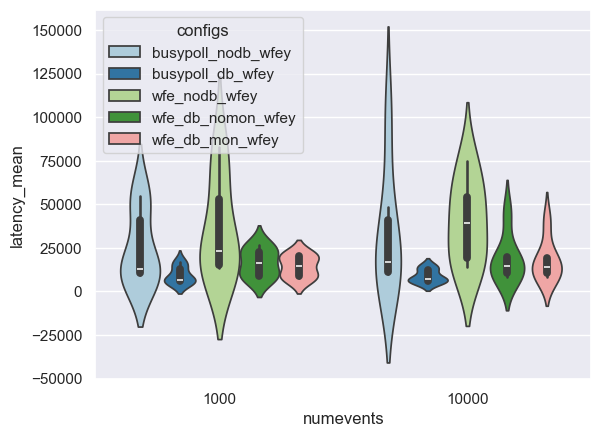

In [13]:
#upper_limit = df_used['latency_mean'].mean() + 3*df_used['latency_mean'].std()
#lower_limit = df_used['latency_mean'].mean() - 3*df_used['latency_mean'].std()

#lat_low = (df_used['latency_mean'] < lower_limit)
#lat_high = (df_used['latency_mean'] > upper_limit)

#print(np.where(lat_high)[0])
#print(df_used)
#df_used.drop(np.where(lat_high)[0], inplace=True)
#print(df_used.loc[:,['KEY', 'latency_mean']])

sns.violinplot(data=df_used, x='numevents', y='latency_mean', hue='configs')
#print(df_used[ ( df_used['numevents'] == 1000) & (df_used['configs'] == 'wfe_db_nomon_wfey')].loc[:, ['KEY', 'latency_mean']])

<Axes: xlabel='numevents', ylabel='latency_min'>

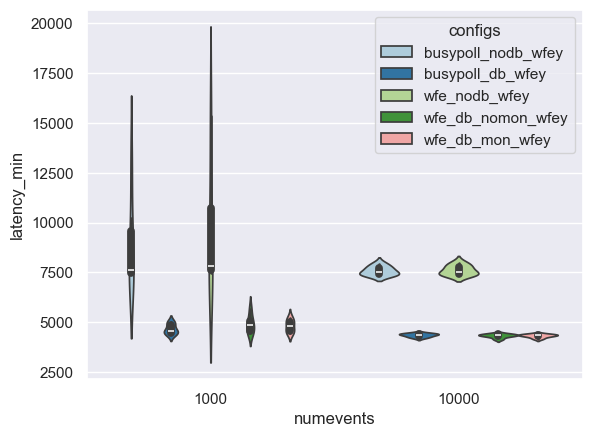

In [14]:
sns.violinplot(data=df_used, x='numevents', y='latency_min', hue='configs')

<Axes: xlabel='numevents', ylabel='latency_max'>

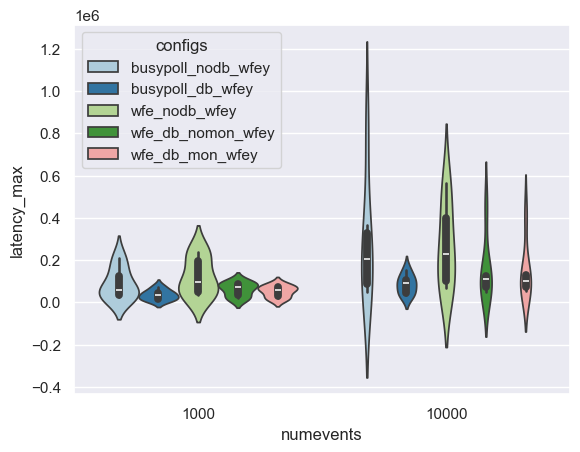

In [15]:
sns.violinplot(data=df_used, x='numevents', y='latency_max', hue='configs')

##### Min/Max/Mean per Config

/var/folders/_g/p1k71chj0gz6j8jb7c48r03c0000gn/T/ipykernel_81240/1961947304.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

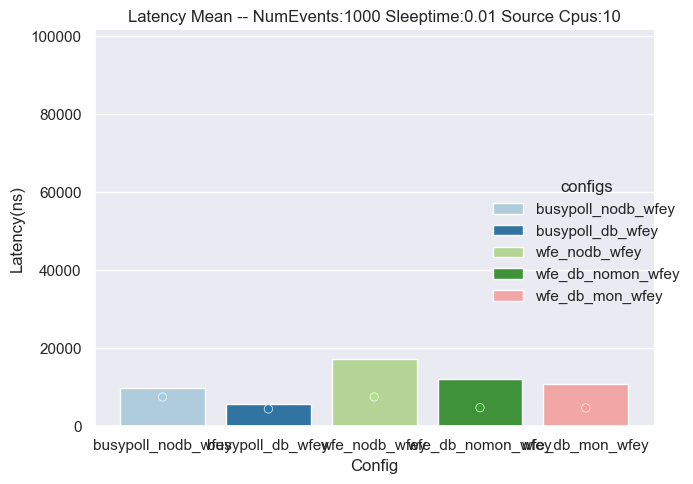

<Figure size 640x480 with 0 Axes>

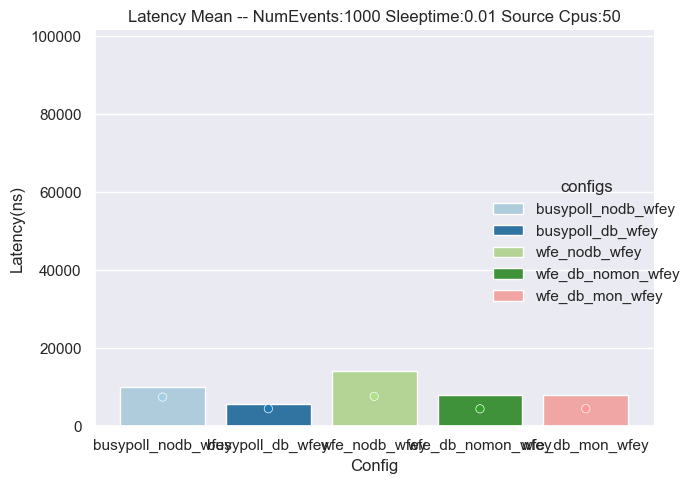

<Figure size 640x480 with 0 Axes>

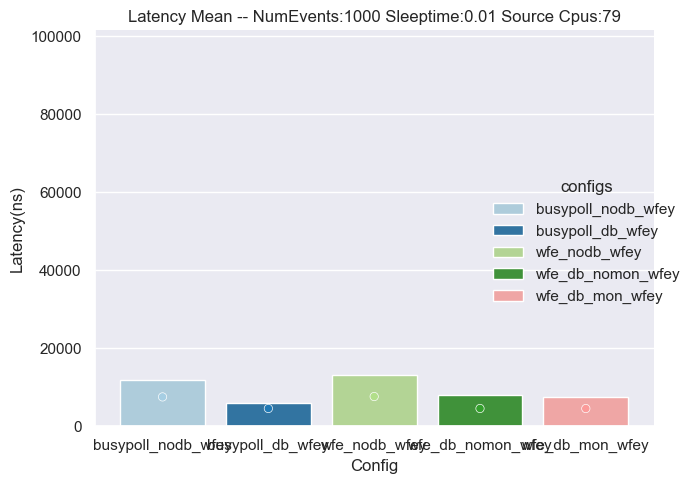

<Figure size 640x480 with 0 Axes>

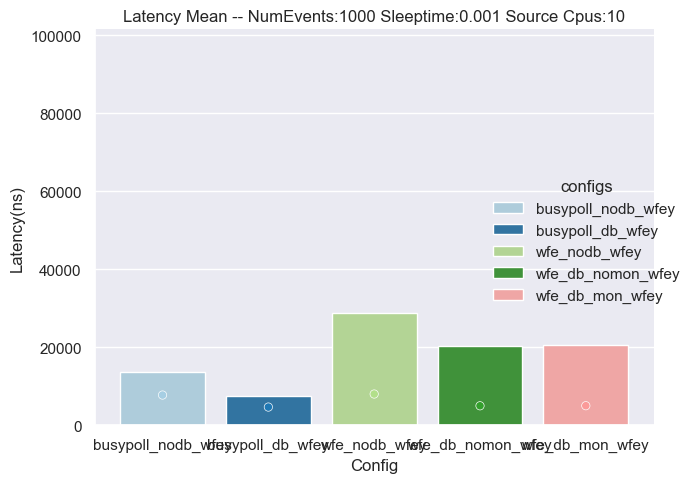

<Figure size 640x480 with 0 Axes>

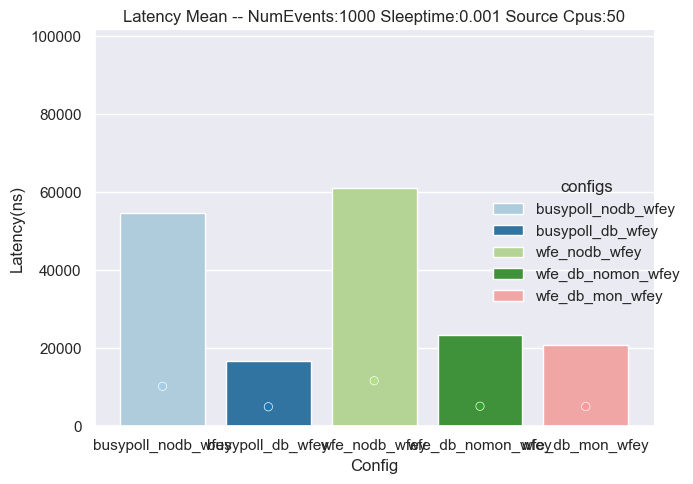

<Figure size 640x480 with 0 Axes>

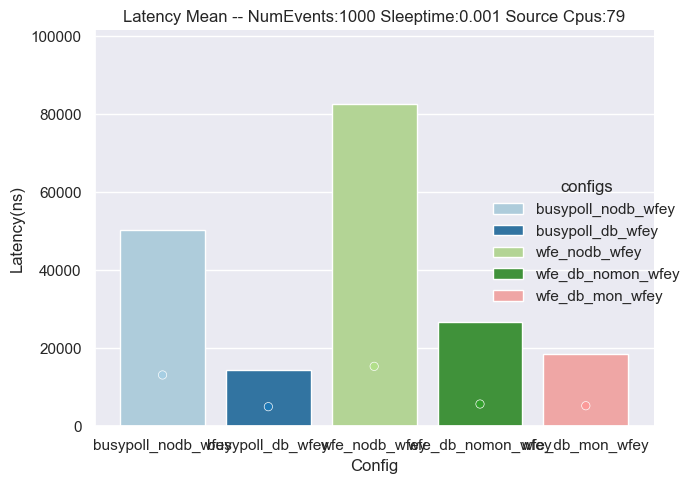

<Figure size 640x480 with 0 Axes>

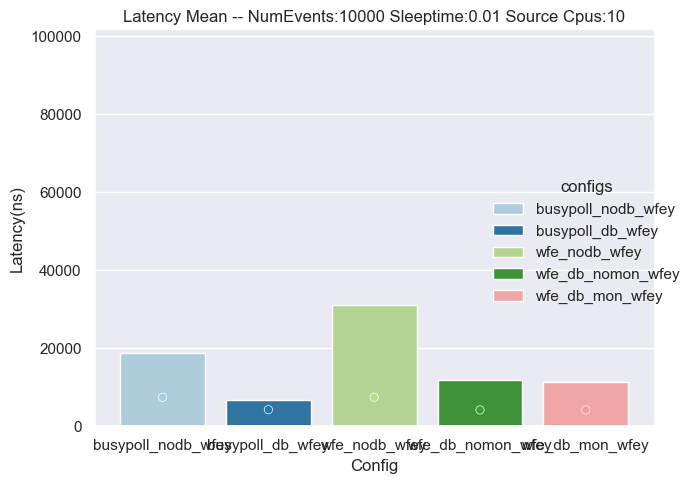

<Figure size 640x480 with 0 Axes>

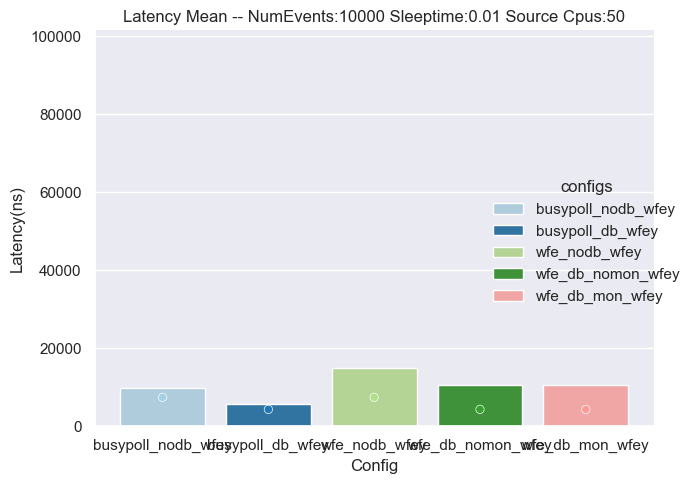

<Figure size 640x480 with 0 Axes>

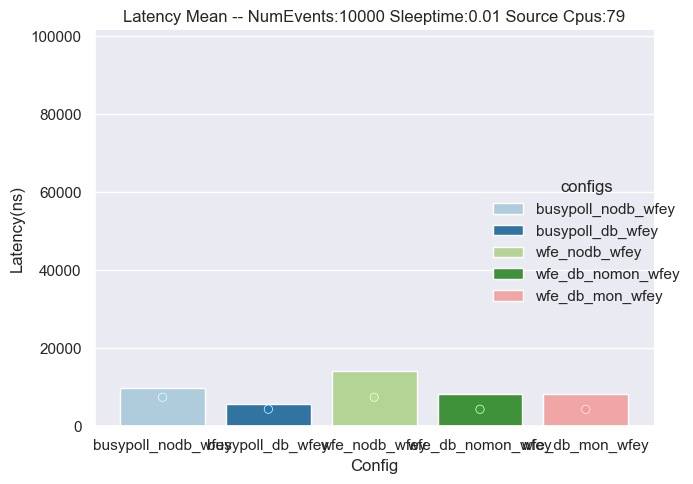

<Figure size 640x480 with 0 Axes>

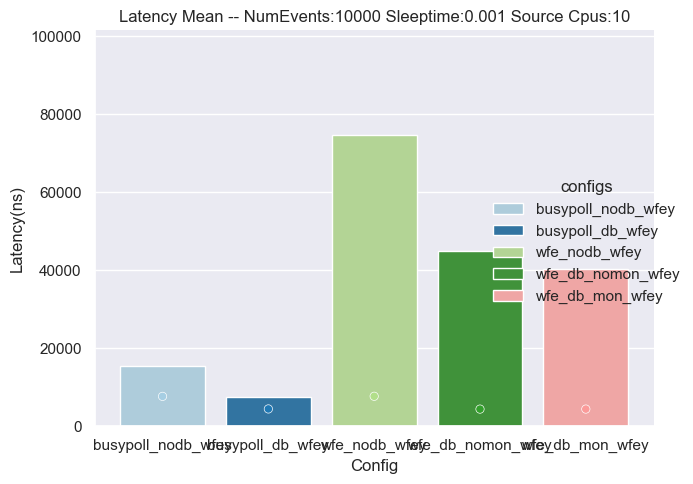

<Figure size 640x480 with 0 Axes>

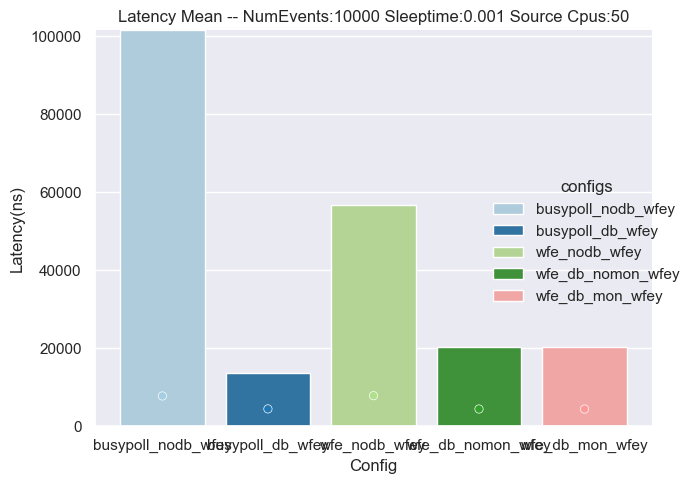

<Figure size 640x480 with 0 Axes>

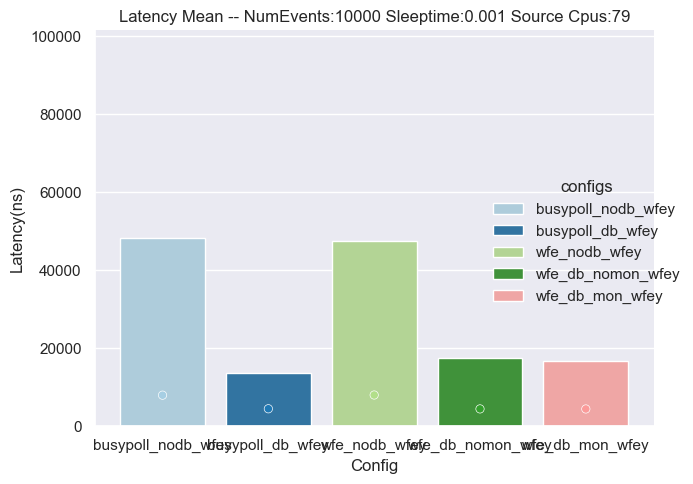

In [16]:
df_used = return_df(bm_output_clean)
config_set = None

for e in eventsubset:
    for s in sleeptimesubset:
        for sc in sourceCPUsubset:
            plt.figure()
            config_set = df_used[ (df_used['numevents'] == e) &
                                    (df_used['sleeptime'] == s) &
                                    (df_used['sourceCPUs'] == sc)]

            key = str(e)+"_"+str(s)+"_"+str(sc)
            try:
                g = sns.catplot(
                data=config_set, 
                kind="bar",
                x='configs',
                y='latency_mean',
                hue='configs',
                legend=True,
                errorbar=None
                )
            except Exception as exc:
                print(f"{key}: {exc.__class__.__name__}")
                continue

            sns.scatterplot(
            data=config_set,
            x='configs',
            y='latency_min',
            hue='configs',
            legend=False
            )

        
            plt.title('Latency Mean -- NumEvents:'+str(e)+' Sleeptime:'+s+' Source Cpus:'+sc)
            plt.xlabel('Config')
            plt.ylabel('Latency(ns)')
            #plt.ylim(0,config_set['latency_mean'].max())
            plt.ylim(0,df_used['latency_mean'].max())
            plt.tight_layout()

### HWMON 3